# Product sales prediction and segmentation

## Domain of Project - Retail Analytics

### Team members:

* Ahamed basha 
* Anish Kumar K 
* Arif Hussain 
* M.Khushi 
* Rashika S



**Mentor** - Vidhya Kannaiah


## Loading required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=[15,7]

import warnings
warnings.filterwarnings('ignore')

**The following dataset has the Amazon sales of these brands.**

**BabyPro** - BabyPro is a brand that 
 deals with baby-proofing products 
like corner guards, edge guards, 
socket covers, child locks and others.

**Cinagro** - Cinagro is a brand which 
sells Gardening essentials

**Frenchware** - Frenchware is an Online 
Products for Home and Kitchen.

**Rolid** - Rolid is the brand which sells
Electronic Home Safe / Locker for 
Home, Office and Shops.

**Rusabl** - Rusabl is the brand which 
sells Sustainable and Eco-Friendly 
Products.

**Senego** - Senego is the brand that 
sells beanbags and Laptop 
sleeves etc.

**Vifitkit** - Vifitkit is yoga mats 
manufacturer and supplier.

**XTrim** - X Trim customizes 
development of Laces, Belts, 
Buttons, Metal Fittings & host of 
new fashion Trims.

**Yogarise** - Yogarise is company 
which deals with the Yoga mats and
products.

### Loading the Dataset

In [2]:
pd.set_option("display.max_columns", None)
df = pd.read_excel("cap project cleaned sheet.xlsx")

In [3]:
# Shape
df.shape

(31936, 23)

* **The dimension od data has 31936 rows and 23 columns.**

In [4]:
df.head(2)

,date/time,settlement id\n,type\n,order id,Brand Name,Sku,description \n,quantity,account type,fulfillment,order state\n,order postal\n,Amazon sales\n,shipping credits\n,promotional rebates\n,Total sales tax liable(GST before adjusting TCS),TCS-CGST,TCS-SGST,TCS-IGST,selling fees\n,fba fees\n,other transaction fees\n,total\n
0,31-Mar-2022 6:30:44 pm UTC,17385380782,Order\n,402-6386059-1169157,Rusabl,1X-9LGR-TBKF,Rusabl Stainless Steel Straws with Cleaning Br...,1,Electronic Transactions (Credit Card/Net Banki...,Amazon\n,Maharashtra,411032.0,160.16,0.0,0.0,28.84,-0.8,-0.8,0.00,-7.81,-64.9,-14.16,100.53
1,31-Mar-2022 6:31:40 pm UTC,17385346872,Order\n,402-0401580-0134761,Rusabl,2P-COZK-5KGJ,Rusabl Organic Bamboo Toothbrush for Adults | ...,1,Cash On Delivery Transactions and Non-Transact...,Amazon\n,Madhya Pradesh,486001.0,211.86,0.0,0.0,38.14,0.0,0.0,-2.12,-17.70,-64.9,-14.16,151.12


In [5]:
# Columns
df.columns

Index(['date/time', 'settlement id\n', 'type\n', 'order id', 'Brand Name',
       'Sku', 'description \n', 'quantity', 'account type', 'fulfillment',
       'order state\n', 'order postal\n', 'Amazon sales\n',
       'shipping credits\n', 'promotional rebates\n',
       'Total sales tax liable(GST before adjusting TCS)', 'TCS-CGST',
       'TCS-SGST', 'TCS-IGST', 'selling fees\n', 'fba fees\n',
       'other transaction fees\n', 'total\n'],
      dtype='object')

### Checking dtypes¶

In [6]:
df.dtypes

date/time                                            object
settlement id\n                                       int64
type\n                                               object
order id                                             object
Brand Name                                           object
Sku                                                  object
description \n                                       object
quantity                                              int64
account type                                         object
fulfillment                                          object
order state\n                                        object
order postal\n                                      float64
Amazon sales\n                                      float64
shipping credits\n                                  float64
promotional rebates\n                               float64
Total sales tax liable(GST before adjusting TCS)    float64
TCS-CGST                                

In [7]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31936 entries, 0 to 31935
Data columns (total 23 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   date/time                                         31936 non-null  object 
 1   settlement id
                                    31936 non-null  int64  
 2   type
                                             31936 non-null  object 
 3   order id                                          31913 non-null  object 
 4   Brand Name                                        31936 non-null  object 
 5   Sku                                               31936 non-null  object 
 6   description 
                                     31936 non-null  object 
 7   quantity                                          31936 non-null  int64  
 8   account type                                      31936 non-null  object 
 9   fulfillment      

* **we observe that there are 9 object variables and 14 numerical variable/attributes**

### Checking For Duplicate records:

In [8]:
df[df.duplicated()]

,date/time,settlement id\n,type\n,order id,Brand Name,Sku,description \n,quantity,account type,fulfillment,order state\n,order postal\n,Amazon sales\n,shipping credits\n,promotional rebates\n,Total sales tax liable(GST before adjusting TCS),TCS-CGST,TCS-SGST,TCS-IGST,selling fees\n,fba fees\n,other transaction fees\n,total\n
231,01-Apr-2022 3:56:30 am UTC,17385380782,Order\n,408-8258805-4513941,Rusabl,0N-FT7Z-4UCK,Rusabl Stainless Steel Cutlery Set | Reusable ...,1,Electronic Transactions (Credit Card/Net Banki...,Amazon\n,Nagaland,797001.0,272.32,35.71,-35.71,32.68,0.00,0.00,-2.72,0.00,-31.86,0.0,270.42
232,01-Apr-2022 3:56:30 am UTC,17385380782,Order\n,408-8258805-4513941,Rusabl,0N-FT7Z-4UCK,Rusabl Stainless Steel Cutlery Set | Reusable ...,1,Electronic Transactions (Credit Card/Net Banki...,Amazon\n,Nagaland,797001.0,272.32,35.71,-35.71,32.68,0.00,0.00,-2.72,0.00,-31.86,0.0,270.42
248,01-Apr-2022 4:12:00 am UTC,17385346872,Order\n,408-1468523-6330729,Cinagro,CIN-HOP-SPN-L10,CINAGRO - Heavy Duty 3 Layered Braided Water H...,1,Cash On Delivery Transactions and Non-Transact...,Amazon\n,Maharashtra,411052.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00
456,01-Apr-2022 8:27:52 am UTC,17426616802,Order\n,406-1630090-3801119,Rusabl,VD-90N2-SVYY,Rusabl Stainless Steel Cutlery Set | Reusable ...,1,Electronic Transactions (Credit Card/Net Banki...,Amazon\n,Maharashtra,400089.0,290.18,0.00,0.00,34.82,-1.45,-1.45,0.00,-44.11,-38.94,-23.6,215.45
466,01-Apr-2022 8:41:25 am UTC,17426616802,Order\n,406-3502865-0343544,Babypro,BDB,BabyPro Door Stopper for Baby Safety by Certif...,1,Electronic Transactions (Credit Card/Net Banki...,Amazon\n,Tamil Nadu,600091.0,423.73,0.00,0.00,76.27,0.00,0.00,-4.24,0.00,-38.15,0.0,457.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29668,30-Apr-2022 8:16:32 am UTC,17588435512,Order\n,407-2280496-7996324,Rusabl,1X-9LGR-TBKF,Rusabl Stainless Steel Straws with Cleaning Br...,1,Cash On Delivery Transactions and Non-Transact...,Amazon\n,Maharashtra,400049.0,160.16,0.00,0.00,28.84,-0.80,-0.80,0.00,0.00,-25.96,0.0,161.44
29669,30-Apr-2022 8:16:32 am UTC,17588435512,Order\n,407-2280496-7996324,Rusabl,1X-9LGR-TBKF,Rusabl Stainless Steel Straws with Cleaning Br...,1,Cash On Delivery Transactions and Non-Transact...,Amazon\n,Maharashtra,400049.0,160.16,0.00,0.00,28.84,-0.80,-0.80,0.00,0.00,-25.96,0.0,161.44
30657,04-Apr-2022 2:56:25 pm UTC,17434120212,Order\n,408-3760713-5315538,Xtrim,EF-XT-WLB-DP-LEAF BROWN,XTRIM Unisex Dipping Belt with Adjustable 36-i...,1,Cash On Delivery Transactions and Non-Transact...,Amazon\n,Maharashtra,400095.0,380.51,0.00,0.00,68.49,0.00,0.00,-3.81,0.00,-69.91,0.0,375.28
30658,04-Apr-2022 2:56:25 pm UTC,17434120212,Order\n,408-3760713-5315538,Xtrim,EF-XT-WLB-DP-LEAF BROWN,XTRIM Unisex Dipping Belt with Adjustable 36-i...,1,Cash On Delivery Transactions and Non-Transact...,Amazon\n,Maharashtra,400095.0,380.51,0.00,0.00,68.49,0.00,0.00,-3.81,0.00,-69.91,0.0,375.28


In [9]:
df.drop_duplicates(inplace=True)

### Inferences:
* We are dropping the duplicate records.

In [10]:
df.shape

(31825, 23)

### Changing column names

In [11]:
df.columns = ['Date_Time','settlement_id','Type','order_id','Brand_Name',"Sku",'description','Quantity','Account_Type','Fulfillment',
       'Order_State','order_postal','Amazon_Sales','Shipping_Credits', 'Promotional_Rebates','Total_Sales_Tax_Liable(GST before adj TCS)', 'TCS_CGST',
        'TCS_SGST', 'TCS_IGST', 'Selling_Fees', 'Fba_Fees',
       'Other_Transaction_Fees','Total_Payment']
df.head(2)

,Date_Time,settlement_id,Type,order_id,Brand_Name,Sku,description,Quantity,Account_Type,Fulfillment,Order_State,order_postal,Amazon_Sales,Shipping_Credits,Promotional_Rebates,Total_Sales_Tax_Liable(GST before adj TCS),TCS_CGST,TCS_SGST,TCS_IGST,Selling_Fees,Fba_Fees,Other_Transaction_Fees,Total_Payment
0,31-Mar-2022 6:30:44 pm UTC,17385380782,Order\n,402-6386059-1169157,Rusabl,1X-9LGR-TBKF,Rusabl Stainless Steel Straws with Cleaning Br...,1,Electronic Transactions (Credit Card/Net Banki...,Amazon\n,Maharashtra,411032.0,160.16,0.0,0.0,28.84,-0.8,-0.8,0.00,-7.81,-64.9,-14.16,100.53
1,31-Mar-2022 6:31:40 pm UTC,17385346872,Order\n,402-0401580-0134761,Rusabl,2P-COZK-5KGJ,Rusabl Organic Bamboo Toothbrush for Adults | ...,1,Cash On Delivery Transactions and Non-Transact...,Amazon\n,Madhya Pradesh,486001.0,211.86,0.0,0.0,38.14,0.0,0.0,-2.12,-17.70,-64.9,-14.16,151.12


**Changed the column names so that it is easy for further analysis.**

## Checking the Missing Values

In [12]:
df.isnull().sum()[df.isnull().sum()!=0]

order_id         22
Fulfillment     978
Order_State     998
order_postal    998
dtype: int64

In [13]:
# Percentage of null values
df.isnull().sum()/len(df)*100

Date_Time                                     0.000000
settlement_id                                 0.000000
Type                                          0.000000
order_id                                      0.069128
Brand_Name                                    0.000000
Sku                                           0.000000
description                                   0.000000
Quantity                                      0.000000
Account_Type                                  0.000000
Fulfillment                                   3.073056
Order_State                                   3.135899
order_postal                                  3.135899
Amazon_Sales                                  0.000000
Shipping_Credits                              0.000000
Promotional_Rebates                           0.000000
Total_Sales_Tax_Liable(GST before adj TCS)    0.000000
TCS_CGST                                      0.000000
TCS_SGST                                      0.000000
TCS_IGST  

### Changing dtype for Date_time

In [14]:
df["Date_Time"] = pd.to_datetime(df["Date_Time"])

Since the column Date time is object datatype , we change it to datetime64[ns, UTC]

### Replacing Account Type names

In [15]:
df["Account_Type"].unique()

array(['Electronic Transactions (Credit Card/Net Banking/GC)',
       'Cash On Delivery Transactions and Non-Transactional Fees'],
      dtype=object)

In [16]:
df["Account_Type"] = df["Account_Type"].replace('Electronic Transactions (Credit Card/Net Banking/GC)','Electronic Transactions')
df["Account_Type"] = df["Account_Type"].replace('Cash On Delivery Transactions and Non-Transactional Fees','Cash On Delivery')

In [17]:
df["Account_Type"].unique()

array(['Electronic Transactions', 'Cash On Delivery'], dtype=object)

Electronic Transactions (Credit Card/Net Banking/GC)', 'Cash On Delivery Transactions and Non-Transactional Fees' changed to Electronic Transactions and cash on delivery

### Replacing Fulfillment names

In [18]:
df["Fulfillment"].unique()

array(['Amazon\n', nan, 'Merchant'], dtype=object)

In [19]:
df["Fulfillment"] = df["Fulfillment"].replace('Amazon\n','Amazon')
df["Fulfillment"] = df["Fulfillment"].replace(np.nan,'Unknown')

In [20]:
df["Fulfillment"].unique()

array(['Amazon', 'Unknown', 'Merchant'], dtype=object)

**we changed the class name of Fullfillment as Amazon and null values as Unknown.**

### Cleaning Type Variable¶

In [21]:
df["Type"].unique()

array(['Order\n', 'Adjustment\n', 'Refund\n', 'SAFE-T Reimbursement',
       'Reimbursements'], dtype=object)

In [22]:
df['Type']=df['Type'].str.strip('\n')

In [23]:
df["Type"].unique()

array(['Order', 'Adjustment', 'Refund', 'SAFE-T Reimbursement',
       'Reimbursements'], dtype=object)

### Analysis of records Analysis of records where Order State and Order Postal has Null Values:

In [24]:
df[(df['Order_State'].isna())& (df['order_postal'].isna())]['description'].unique()

array(['FBA Inventory Reimbursement - Customer Return',
       'FBA Inventory Reimbursement - Customer Service Issue',
       'FBA Inventory Reimbursement - Damaged:Warehouse',
       'SAFE-T Claim ID: 52207-13806-3277932',
       'SAFE-T Claim ID: 80200-86404-7861214',
       'SAFE-T Claim ID: 56021-18902-4272850',
       'FBA Inventory Reimbursement - General Adjustment',
       'SAFE-T Claim ID: 84366-78118-0742342',
       'Reimbursement issued for lost or damaged package',
       'FBA Inventory Reimbursement - Lost:Inbound',
       'SAFE-T Claim ID: 99066-76200-7557216'], dtype=object)

In [25]:
Adj_orders=df[(df['Order_State'].isna())& (df['order_postal'].isna())]
Adj_orders.head(2)

,Date_Time,settlement_id,Type,order_id,Brand_Name,Sku,description,Quantity,Account_Type,Fulfillment,Order_State,order_postal,Amazon_Sales,Shipping_Credits,Promotional_Rebates,Total_Sales_Tax_Liable(GST before adj TCS),TCS_CGST,TCS_SGST,TCS_IGST,Selling_Fees,Fba_Fees,Other_Transaction_Fees,Total_Payment
90,2022-03-31 20:03:35+00:00,17385346872,Adjustment,407-3110784-9728329,Cinagro,CIN-HOP-SPN-L10,FBA Inventory Reimbursement - Customer Return,1,Cash On Delivery,Unknown,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,158.67
113,2022-03-31 20:39:05+00:00,17385346872,Adjustment,408-6180360-1688302,Rusabl,1X-9LGR-TBKF,FBA Inventory Reimbursement - Customer Service...,1,Cash On Delivery,Unknown,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.74


we are having the null values of order postal and order state  because these are transaction are of 
* FBA Inventory Reimbursement - Customer Return
* FBA Inventory Reimbursement - Customer Service Issue
* Reimbursement issued for lost or damaged package
* SAFE-T Claim on Amazon is Seller Assurance for Ecommerce Transactions. The essence of the program is that Amazon sellers can issue a refund to a customer in some cases. Namely, if: the losses occurred through no fault of the seller. the damage was in the course of its preparation or delivery.

So, extracting these records separately for further analysis.

In [26]:
Adj_orders.Brand_Name.unique()

array(['Cinagro', 'Rusabl', 'Babypro', 'Frenchware', 'Senego', 'Xtrim',
       'Vifitkit', 'Yogaraise'], dtype=object)

In [27]:
Adj_orders[Adj_orders['description']=='FBA Inventory Reimbursement - Customer Return']['Brand_Name'].unique()

array(['Cinagro', 'Babypro', 'Rusabl', 'Frenchware', 'Senego', 'Xtrim',
       'Vifitkit', 'Yogaraise'], dtype=object)

<AxesSubplot:>

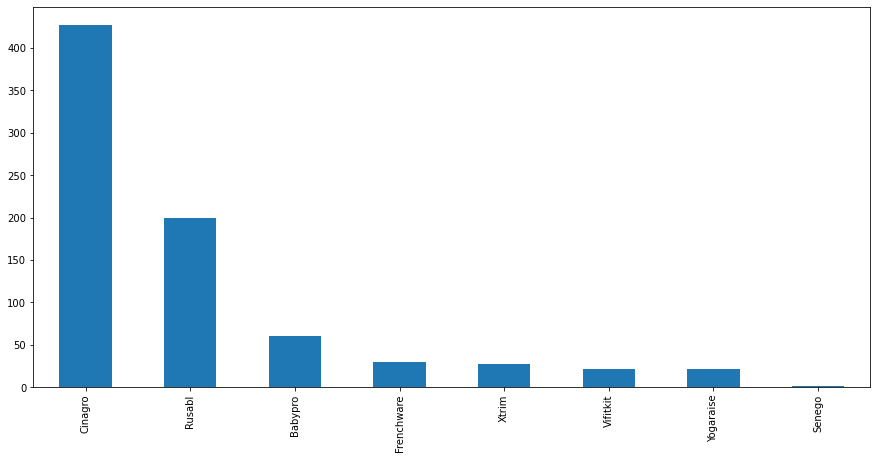

In [28]:
# Plot of the no of orders returned due Customer Return for each brands
Adj_orders[Adj_orders['description']=='FBA Inventory Reimbursement - Customer Return']['Brand_Name'].value_counts().plot(kind='bar')

In [29]:
# Plot of the no of orders returned due Customer Return for each brands
Adj_orders[Adj_orders['description']=='FBA Inventory Reimbursement - Customer Return']['Account_Type'].unique()

array(['Cash On Delivery'], dtype=object)

* **Except Rolid all other brands are getting customer return where as Cinagro has highest no of returns and custermer return are of cash on delivery orders.**

<AxesSubplot:>

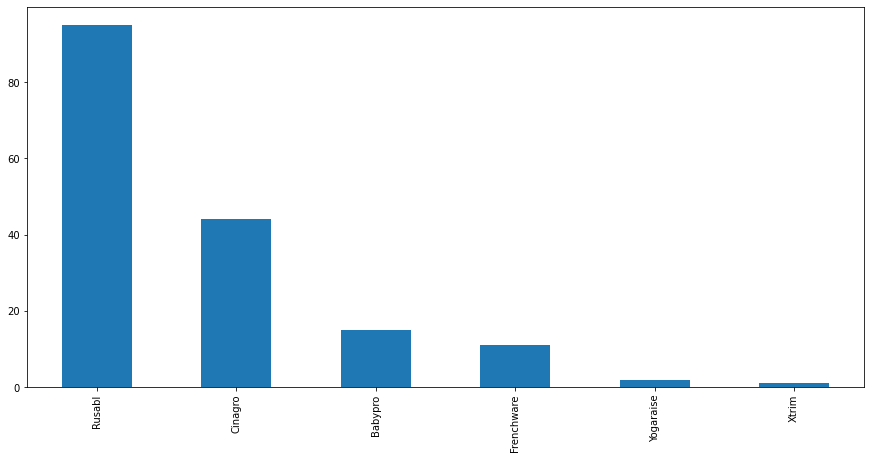

In [30]:
# Plot of the no of orders returned due Customer Service Issue for each brands
Adj_orders[Adj_orders['description']=='FBA Inventory Reimbursement - Customer Service Issue']['Brand_Name'].value_counts().plot(kind='bar')

* **Rusabl has high customer service issues than all other brands.**
* **Rolid, Vifitkit, Senego has no customer service issue.**

<AxesSubplot:>

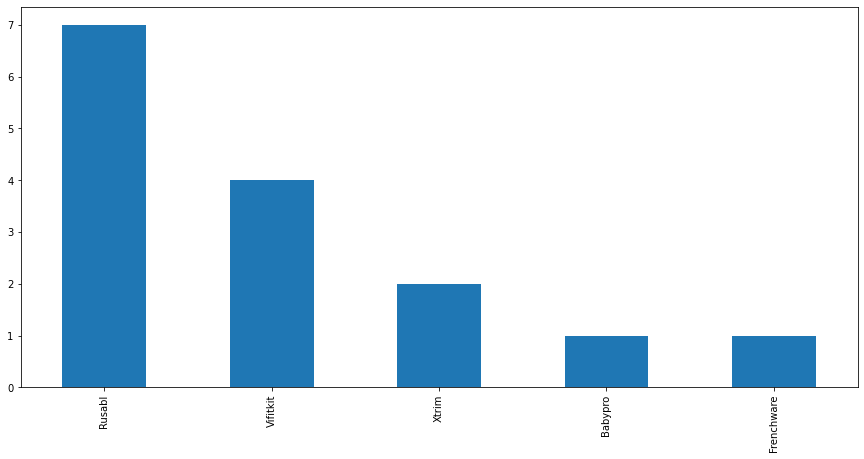

In [31]:
# Plot of the no of orders returned due to Reimbursement issued for lost or damaged package for each brands
Adj_orders[Adj_orders['description']=='Reimbursement issued for lost or damaged package']['Brand_Name'].value_counts().plot(kind='bar')

* **Rusabl has the highest number of lost or damaged packasge delivery followed by Vifitkit.**

In [32]:
# Dropping the records where ever we have order state and order postal as null values.
df.dropna(subset='Order_State',inplace=True)

In [33]:
# order_id null values
df[df['order_id'].isna()]

,Date_Time,settlement_id,Type,order_id,Brand_Name,Sku,description,Quantity,Account_Type,Fulfillment,Order_State,order_postal,Amazon_Sales,Shipping_Credits,Promotional_Rebates,Total_Sales_Tax_Liable(GST before adj TCS),TCS_CGST,TCS_SGST,TCS_IGST,Selling_Fees,Fba_Fees,Other_Transaction_Fees,Total_Payment


In [34]:
df.isnull().sum()

Date_Time                                     0
settlement_id                                 0
Type                                          0
order_id                                      0
Brand_Name                                    0
Sku                                           0
description                                   0
Quantity                                      0
Account_Type                                  0
Fulfillment                                   0
Order_State                                   0
order_postal                                  0
Amazon_Sales                                  0
Shipping_Credits                              0
Promotional_Rebates                           0
Total_Sales_Tax_Liable(GST before adj TCS)    0
TCS_CGST                                      0
TCS_SGST                                      0
TCS_IGST                                      0
Selling_Fees                                  0
Fba_Fees                                

* **All the null values is treated.**

## Feature Engineering

### Extracting only Date and Time from Date_time variable

In [35]:
# Data
df["Date"] = pd.DatetimeIndex(df["Date_Time"]).date
df.insert(loc=1, column='Date', value=df.pop('Date'))

# Time
df['Time']=pd.DatetimeIndex(df["Date_Time"]).time
df.insert(loc=2, column='Time', value=df.pop('Time'))

df.head(1)

,Date_Time,Date,Time,settlement_id,Type,order_id,Brand_Name,Sku,description,Quantity,Account_Type,Fulfillment,Order_State,order_postal,Amazon_Sales,Shipping_Credits,Promotional_Rebates,Total_Sales_Tax_Liable(GST before adj TCS),TCS_CGST,TCS_SGST,TCS_IGST,Selling_Fees,Fba_Fees,Other_Transaction_Fees,Total_Payment
0,2022-03-31 18:30:44+00:00,2022-03-31,18:30:44,17385380782,Order,402-6386059-1169157,Rusabl,1X-9LGR-TBKF,Rusabl Stainless Steel Straws with Cleaning Br...,1,Electronic Transactions,Amazon,Maharashtra,411032.0,160.16,0.0,0.0,28.84,-0.8,-0.8,0.0,-7.81,-64.9,-14.16,100.53


### Extracting the No of pieces of the product from sku code

In [36]:
df.Sku.unique()

array(['1X-9LGR-TBKF', '2P-COZK-5KGJ', 'RBL-BKT-WHT-P1',
       'FRW-SWH-BLK-P19', 'FRW-SBF-BLK-P18', 'RBL-WCB-BRW-XL-P1', 'DPGH2',
       'CIN-DIA-16T-P50-BLK', 'FRW-SNS-GRN-P04', 'ON-J6JD-7ZB3',
       'AT-6KUV-L3YM', 'FB-LV4G-G8FT', 'RBL-BCB-BRW-P1',
       'CIN-DIA-16T-P10', 'AD-K6MK-NQLK', 'RBL-WCB-BRW-MED-P1',
       'CIN-GMW-RED-P1', 'RBL-SSP-ASR-P4', 'CGB3', 'FRW-SUS-BLK-P10',
       'FRW-SWH-GRN-P18', 'RBL-SSP-COP-P4', '7X-M6LH-IAJR',
       'A6-K2RM-CA53', 'CIN-HOP-SPN-L30', 'RBL-WCB-BRW-SML-P1',
       'CIN-MHH-WSQ-P1', 'FRW-SWH-PNK-P18', 'FRW-CDT-SLV-P56', 'ESP2',
       'CIN-DMS-16D-50M', 'FRW-SSS-BLK-P06', 'MQ-B88R-LRAD', 'SFB2A',
       'VD-90N2-SVYY', 'CIN-DFP-4MM-50M', 'CIN-DRI-W30-P1',
       'W0-DEWP-I4IK', 'NX-OC7J-VQKH', 'CIN-DIA-PFL-30M-BLK',
       'CIN-HDP-15i-P3-GRN', 'KL-ZE1G-4OSN', 'RBL-SSP-RBW-P4',
       'UF-P68R-IRSE', 'CIN-HDP-18i-P2-GRN', 'CIN-MET-S3-BK',
       'CIN-DMS-16D-25M', 'CIN-FPI-LDS-P1', 'SEN-LSL-16IN-P1',
       'CIN-DIA-16T-P100', 'CIN-PMP-A

In [37]:
b=df['Sku'].str.split('-',expand=True)[3]
df['Pieces[3]'] = b[b.str.find('P')==0].str.strip('P').astype('float')
df['P1']=df['Pieces[3]'].fillna(0)
c=df['Sku'].str.split('-',expand=True)[4]
df['Pieces[4]'] = c[c.str.find('P')==0].str.strip('P').replace('NK',0).astype('float')
df['P2']= df['Pieces[4]'].fillna(0)
d=df['Sku'].str.split('-',expand=True)[5]
df['Pieces[5]'] = d[d.str.find('P')==0].str.strip('P').astype('float')
df['P3']= df['Pieces[5]'].fillna(0)
df['No_of_Pieces']=(df['P1']+df['P2']+df['P3']).astype('int').replace(0,np.nan)
df=df.drop(columns=['Pieces[3]','P1','Pieces[4]','P2','Pieces[5]','P3'],axis=1)
df.insert(loc=8, column='No_of_Pieces', value=df.pop('No_of_Pieces'))
df.loc[(df['No_of_Pieces'].isna()),'No_of_Pieces']=1

### Creating New Variable Charge

In [38]:
df.columns

Index(['Date_Time', 'Date', 'Time', 'settlement_id', 'Type', 'order_id',
       'Brand_Name', 'Sku', 'No_of_Pieces', 'description', 'Quantity',
       'Account_Type', 'Fulfillment', 'Order_State', 'order_postal',
       'Amazon_Sales', 'Shipping_Credits', 'Promotional_Rebates',
       'Total_Sales_Tax_Liable(GST before adj TCS)', 'TCS_CGST', 'TCS_SGST',
       'TCS_IGST', 'Selling_Fees', 'Fba_Fees', 'Other_Transaction_Fees',
       'Total_Payment'],
      dtype='object')

In [39]:
df['Total_Charges']=df['Shipping_Credits']+df['Promotional_Rebates']+df['Total_Sales_Tax_Liable(GST before adj TCS)']+df['TCS_CGST']+df['TCS_SGST']+df['TCS_IGST']+df['Selling_Fees']+df['Fba_Fees']+df['Other_Transaction_Fees']
df.insert(loc=26, column='Total_Charges', value=df.pop('Total_Charges'))

In [40]:
df.head(1)

,Date_Time,Date,Time,settlement_id,Type,order_id,Brand_Name,Sku,No_of_Pieces,description,Quantity,Account_Type,Fulfillment,Order_State,order_postal,Amazon_Sales,Shipping_Credits,Promotional_Rebates,Total_Sales_Tax_Liable(GST before adj TCS),TCS_CGST,TCS_SGST,TCS_IGST,Selling_Fees,Fba_Fees,Other_Transaction_Fees,Total_Payment,Total_Charges
0,2022-03-31 18:30:44+00:00,2022-03-31,18:30:44,17385380782,Order,402-6386059-1169157,Rusabl,1X-9LGR-TBKF,1.0,Rusabl Stainless Steel Straws with Cleaning Br...,1,Electronic Transactions,Amazon,Maharashtra,411032.0,160.16,0.0,0.0,28.84,-0.8,-0.8,0.0,-7.81,-64.9,-14.16,100.53,-59.63


**we are merging Shipping Credits, Promotional Rebates, Total Sales Tax Liable(GST before adj TCS),TCS_CGST,TCS_SGST, TCS_IGST,
Selling Fees,Fba Fees,Other Transaction Fees these variables as charges of the order into one variable to avoid multicollinearity.**

In [41]:
df.dtypes

Date_Time                                     datetime64[ns, UTC]
Date                                                       object
Time                                                       object
settlement_id                                               int64
Type                                                       object
order_id                                                   object
Brand_Name                                                 object
Sku                                                        object
No_of_Pieces                                              float64
description                                                object
Quantity                                                    int64
Account_Type                                               object
Fulfillment                                                object
Order_State                                                object
order_postal                                              float64
Amazon_Sal

## Univariate Analysis

In [43]:
df.select_dtypes(include=np.number).columns

Index(['settlement_id', 'No_of_Pieces', 'Quantity', 'order_postal',
       'Amazon_Sales', 'Shipping_Credits', 'Promotional_Rebates',
       'Total_Sales_Tax_Liable(GST before adj TCS)', 'TCS_CGST', 'TCS_SGST',
       'TCS_IGST', 'Selling_Fees', 'Fba_Fees', 'Other_Transaction_Fees',
       'Total_Payment', 'Total_Charges'],
      dtype='object')

 Skewness of No_of_Pieces is 8.193846323428476
 Skewness of Quantity is 17.723756579342087
 Skewness of Amazon_Sales is 1.9809619056893137
 Skewness of Shipping_Credits is 1.6442457900832612
 Skewness of Promotional_Rebates is -2.2094761015113806
 Skewness of Total_Sales_Tax_Liable(GST before adj TCS) is 2.0578466580033035
 Skewness of TCS_CGST is -2.308425970955354
 Skewness of TCS_SGST is -2.308425970955354
 Skewness of TCS_IGST is -2.9861697787015036
 Skewness of Selling_Fees is -6.276473721357021
 Skewness of Fba_Fees is -0.2789469267456395
 Skewness of Other_Transaction_Fees is 0.30652150026856134
 Skewness of Total_Charges is -1.631667027294854
 Skewness of Total_Payment is 1.8375389008331935


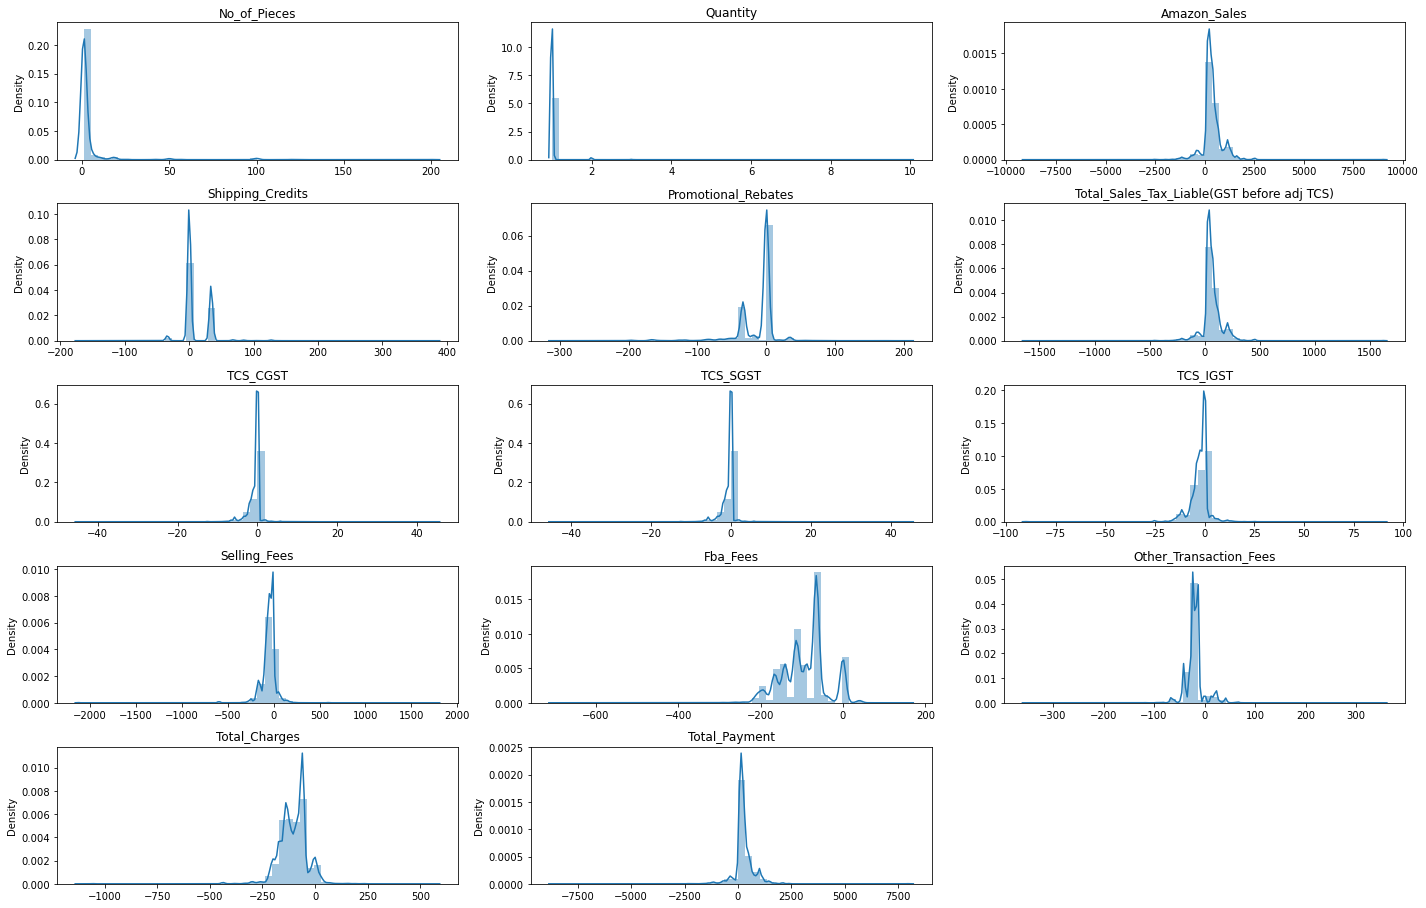

In [44]:
# Numerical
num_cols=['No_of_Pieces', 'Quantity', 'Amazon_Sales',
       'Shipping_Credits', 'Promotional_Rebates',
       'Total_Sales_Tax_Liable(GST before adj TCS)', 'TCS_CGST', 'TCS_SGST',
       'TCS_IGST', 'Selling_Fees', 'Fba_Fees', 'Other_Transaction_Fees', 'Total_Charges', 'Total_Payment']

it = 1
plt.figure(figsize=(20,15))
for i in num_cols:
    plt.subplot(6,3,it)
    sns.distplot(x = df.loc[:,i])
    plt.title(i)
    it += 1
    print(f" Skewness of {i} is {df[i].skew()}")
plt.tight_layout()
plt.show()

### **Inference:**

* **Quantity is highly skewed towards right most of the orders ordered are 1 quantity.**

* **These below columns are symmetrically skewed**
Amazon sales, 
Shipping Credits,
Promotional Rebates,
Total Sales Tax Liable(GST before adjusting TCS),
TCS-CGST,
TCS-SGST,
TCS-IGST,
Fba Fees,
Other Transaction Fees,
Total Fees,

* **The Selling Fees is slightly left skewed**


In [45]:
df.select_dtypes(include='O').columns

Index(['Date', 'Time', 'Type', 'order_id', 'Brand_Name', 'Sku', 'description',
       'Account_Type', 'Fulfillment', 'Order_State'],
      dtype='object')

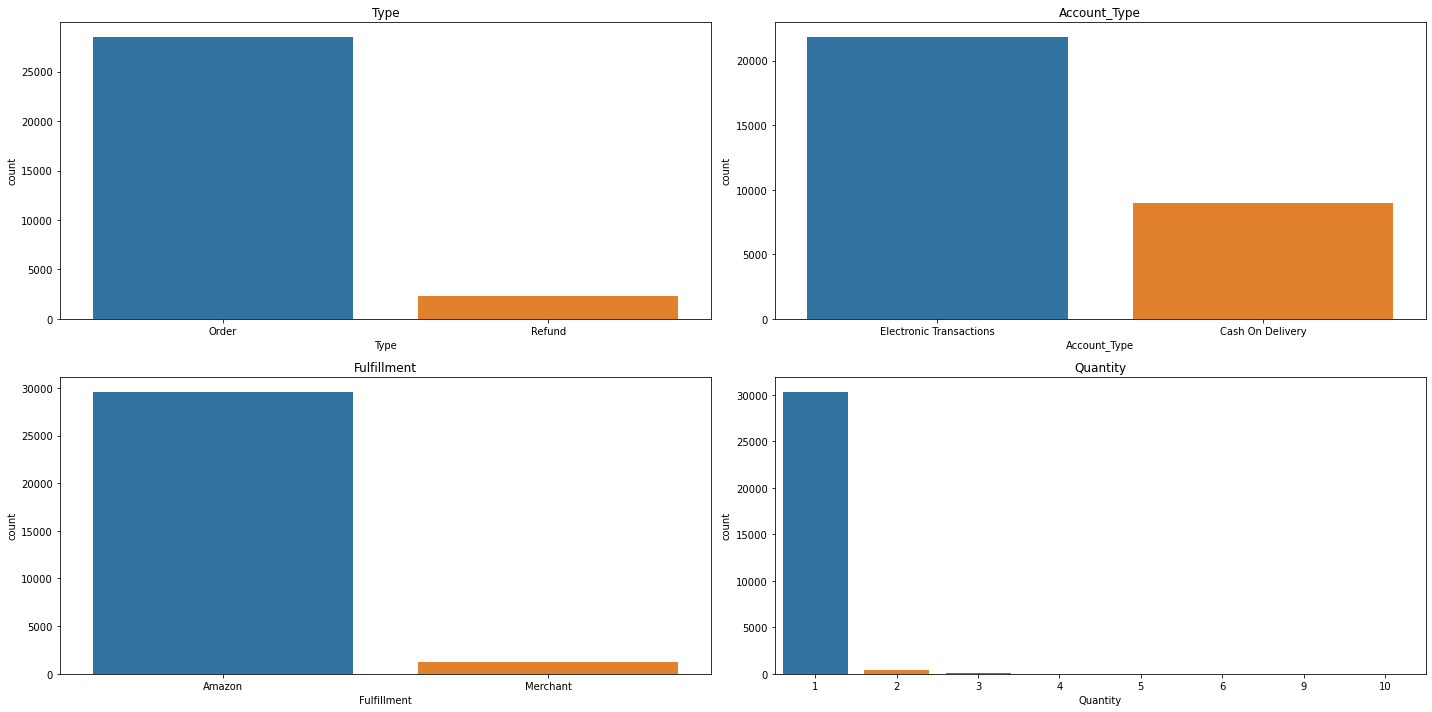

In [42]:
# Catergorical
cat_cols=['Type','Account_Type', 'Fulfillment','Quantity']

it = 1
plt.figure(figsize=(20,10))
for i in cat_cols:
    plt.subplot(2,2,it)
    sns.countplot(x = df.loc[:,i])
    plt.title(i)
    it += 1
plt.tight_layout()
plt.show()

### **Inference:**
* **Rusabl and Cinagro Products are high number of selling products.**
* **Electronic Transactions are more preferrable.**
* **Most of the Sales are done by Amazon.**

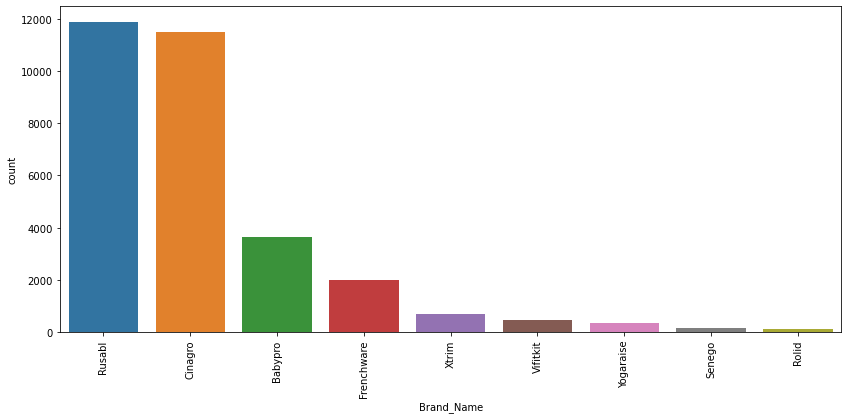

In [43]:
# plot of Brand Name
plt.figure(figsize=(14,6))
large_to_small=df.groupby('Brand_Name').size().sort_values().index[::-1]  # sorting purpose
sns.countplot(x='Brand_Name',data=df,order=large_to_small)
plt.xticks(rotation=90)
plt.show()

### Inferences:
* **The Products Rusabl and Cinagro have high number of sales.**
* **The Products Senego and Rolid has low number of sales.**

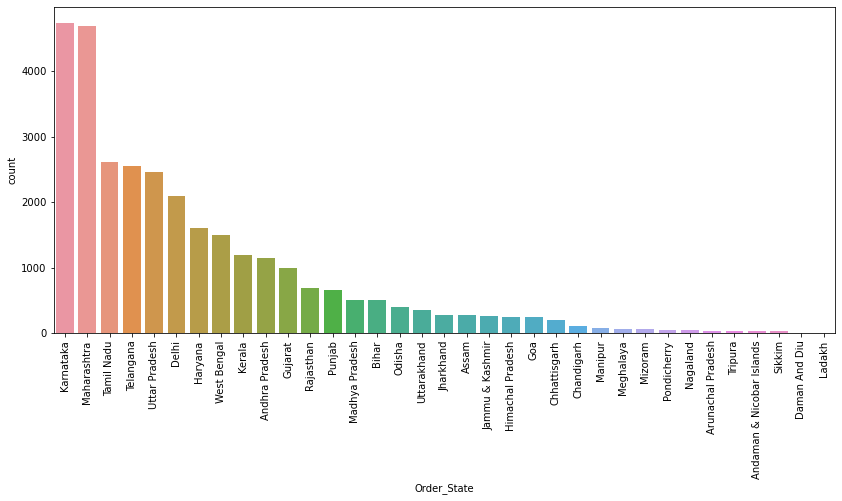

In [44]:
# plot of Order state
plt.figure(figsize=(14,6))
large_to_small=df.groupby('Order_State').size().sort_values().index[::-1]
sns.countplot(x='Order_State',data=df,order=large_to_small)
plt.xticks(rotation=90)
plt.show()

### Inferences:
* **Most of the Sales happened in Karnataka and Maharastra**
* **The States Orissa,Ladakh ,Dadra And Nagar Haveli And Daman are having low sales**

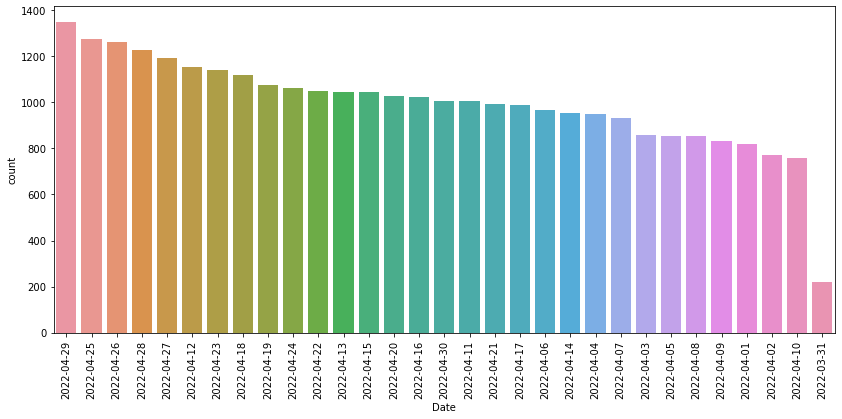

In [45]:
# plot of day wise
plt.figure(figsize=(14,6))
large_to_small=df.groupby('Date').size().sort_values().index[::-1]
sns.countplot(x='Date',data=df,order=large_to_small)
plt.xticks(rotation=90)
plt.show()

### Inferences:
* **29th of April 2022 has high sales and 31st of March 2022 has low sales compared to other days**

## Bivariate Analysis

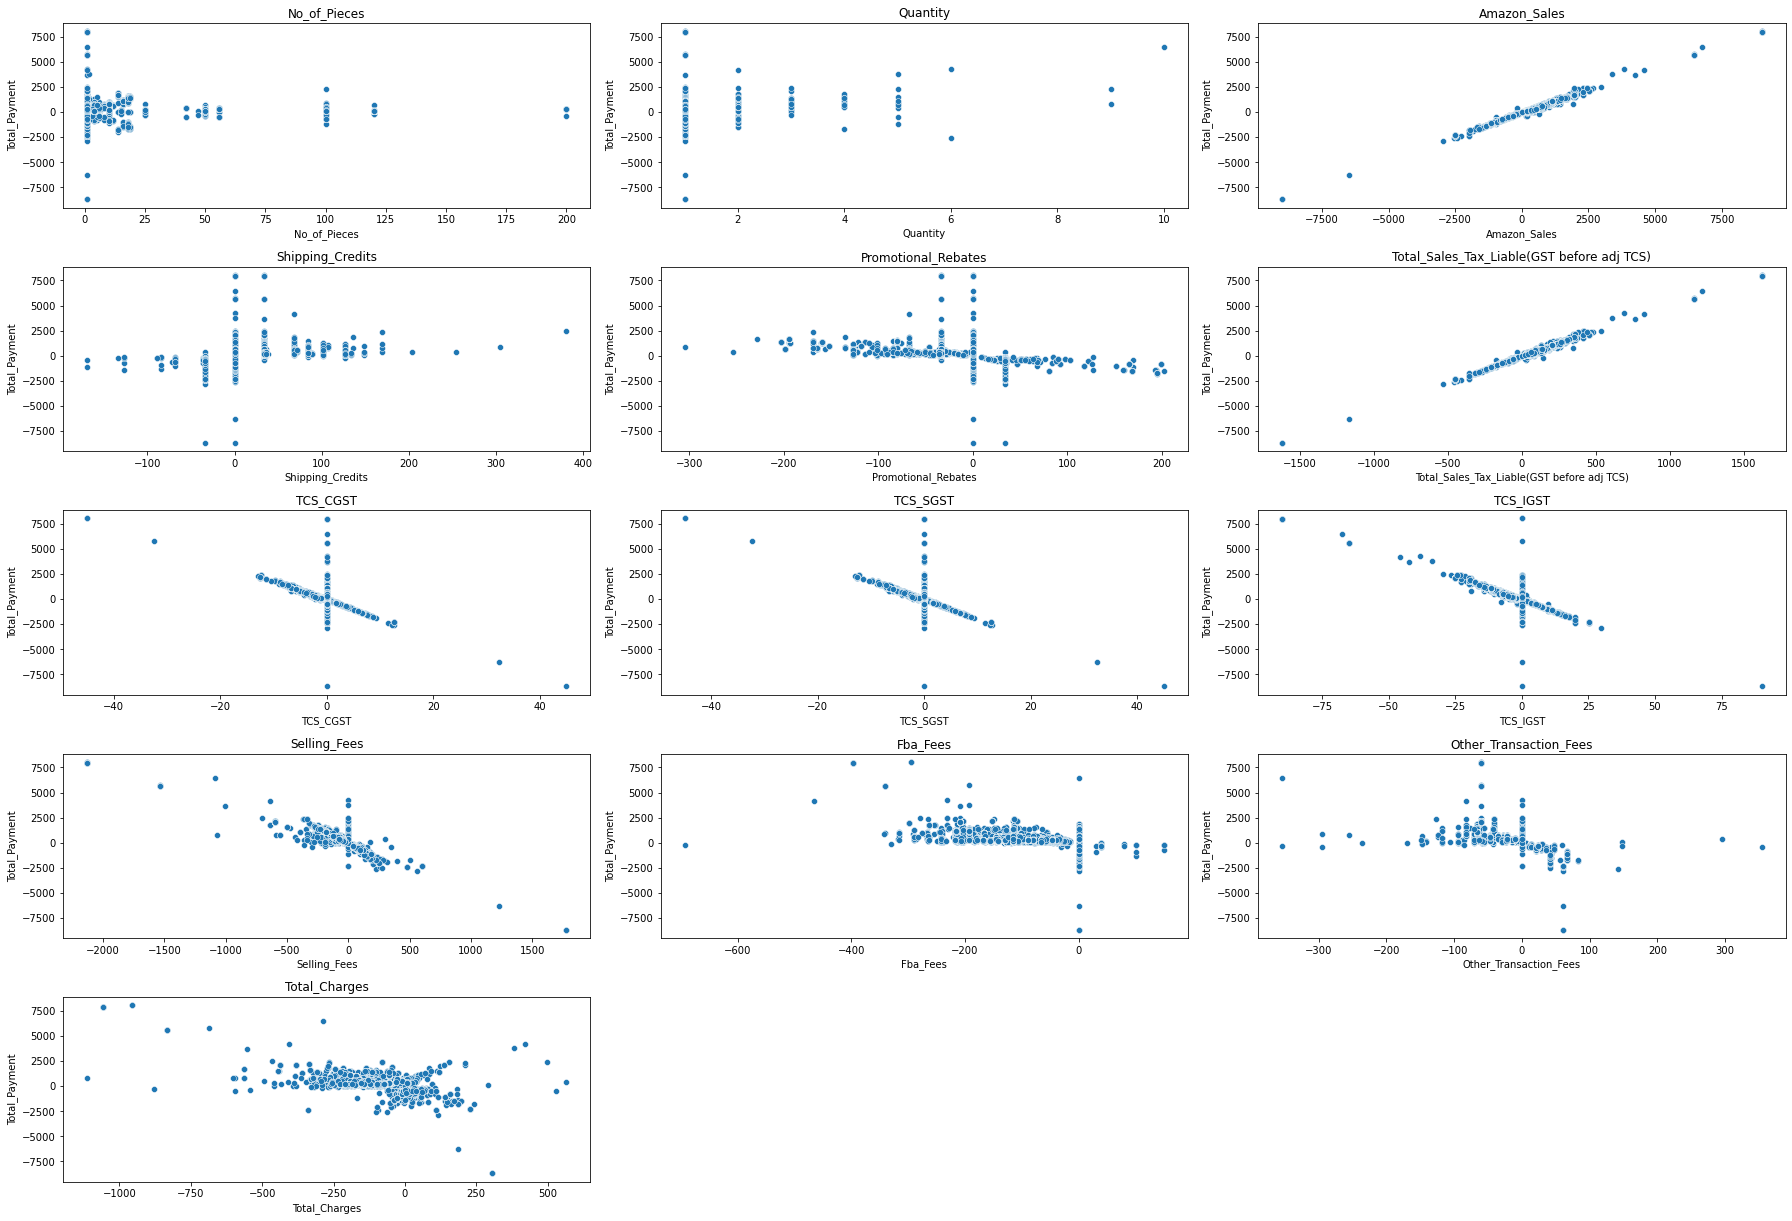

In [46]:
# Numerical vs Numerical
num_cols=['No_of_Pieces', 'Quantity', 'Amazon_Sales',
       'Shipping_Credits', 'Promotional_Rebates',
       'Total_Sales_Tax_Liable(GST before adj TCS)', 'TCS_CGST', 'TCS_SGST',
       'TCS_IGST', 'Selling_Fees', 'Fba_Fees', 'Other_Transaction_Fees', 'Total_Charges']

it = 1
plt.figure(figsize=(25,20))
for i in num_cols:
    plt.subplot(6,3,it)
    sns.scatterplot(x = df.loc[:,i],y=df['Total_Payment'])
    plt.title(i)
    it += 1
plt.tight_layout()
plt.show()

### Inferences:
* **Total_Payment and 'Amazon Sales','Total_Sales_Tax_Liable(GST before adj TCS)' has linear relationship with each other.**
* **TCS_CGST, TCS_SGST, TCS_IGST and Total_Payment has negative linear relationship with each other.**

In [47]:
df.columns

Index(['Date_Time', 'Date', 'Time', 'settlement_id', 'Type', 'order_id',
       'Brand_Name', 'Sku', 'No_of_Pieces', 'description', 'Quantity',
       'Account_Type', 'Fulfillment', 'Order_State', 'order_postal',
       'Amazon_Sales', 'Shipping_Credits', 'Promotional_Rebates',
       'Total_Sales_Tax_Liable(GST before adj TCS)', 'TCS_CGST', 'TCS_SGST',
       'TCS_IGST', 'Selling_Fees', 'Fba_Fees', 'Other_Transaction_Fees',
       'Total_Payment', 'Total_Charges'],
      dtype='object')

In [48]:
# Creating the Hour variable
df['Hour_of_day']=pd.DatetimeIndex(df['Date_Time']).hour
df['Day_of_month']=pd.DatetimeIndex(df['Date_Time']).day

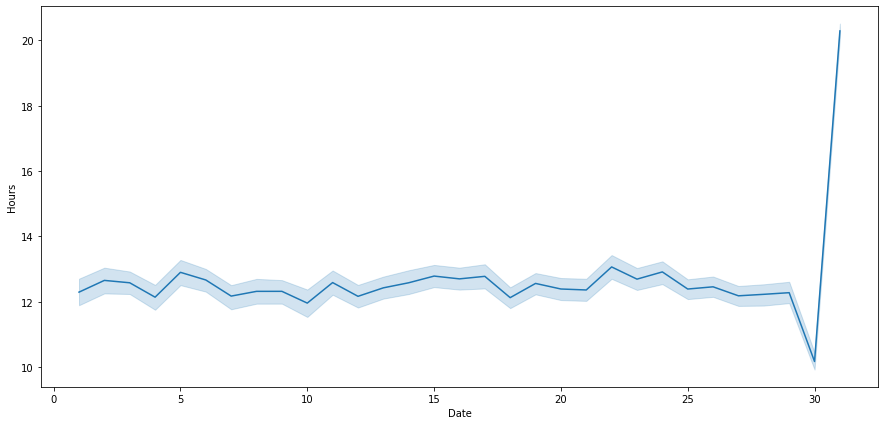

In [49]:
# date vs hours
sns.lineplot(df['Day_of_month'],df['Hour_of_day'])
plt.xlabel('Date')
plt.ylabel('Hours')
plt.show()

### Inference:
* **Most of the orders take place during the Noon hours [12 to 14 hours] of the Day**

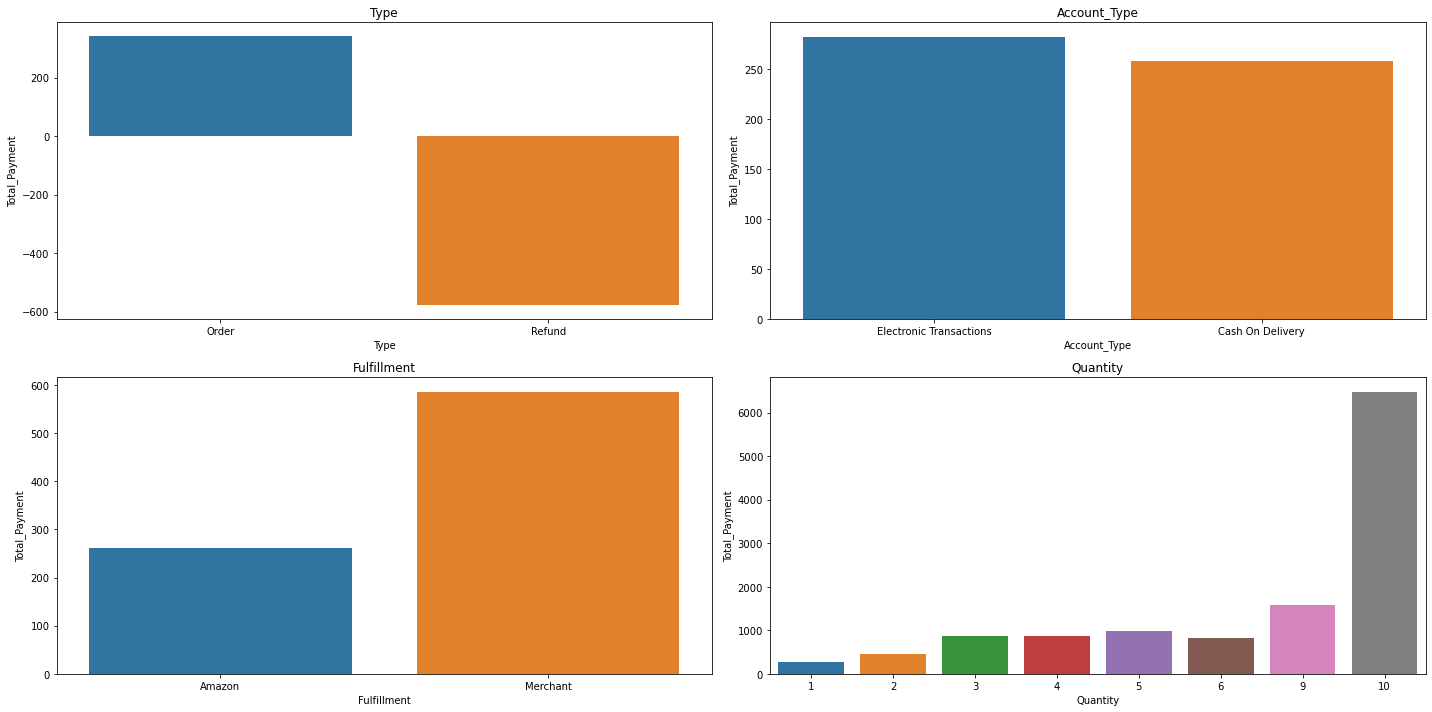

In [50]:
# Numerical vs Catergorical
cat_cols=['Type','Account_Type', 'Fulfillment','Quantity']

it = 1
plt.figure(figsize=(20,10))
for i in cat_cols:
    plt.subplot(2,2,it)
    sns.barplot(x = df.loc[:,i],y=df['Total_Payment'],ci=None)
    plt.title(i)
    it += 1
plt.tight_layout()
plt.show()

### Inferences:
* **The Refund type has negative spent of Total_Payments because those payments are refunded from the amazon to the customers.**
* **Electric Transactions have high Total_Payment amount preferred by the customers compared to Cash on Delivery.**
* **Merchant got the highest amount of Total_Payment.**
* **The Quantity of 10 has highest Total_Payment.**

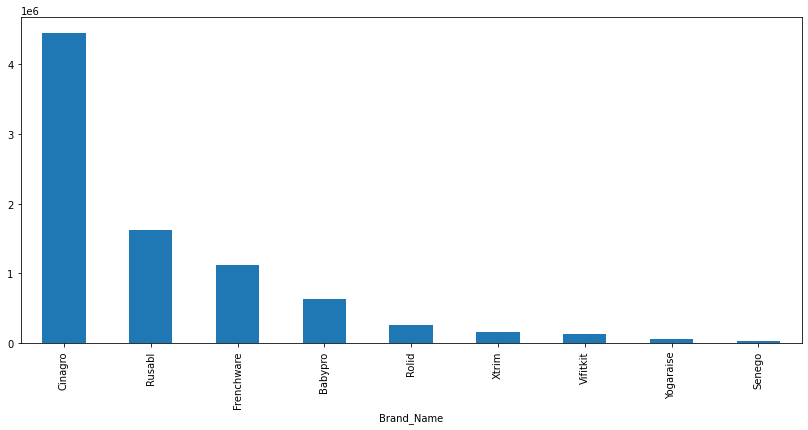

Total Sales amount for the Brand Rusabl 1617635.08
Total Sales amount for the Brand Frenchware 1118797.92
Total Sales amount for the Brand Babypro 639377.9
Total Sales amount for the Brand Cinagro 4442011.93
Total Sales amount for the Brand Senego 39234.91
Total Sales amount for the Brand Rolid 263091.56
Total Sales amount for the Brand Vifitkit 129712.87
Total Sales amount for the Brand Xtrim 162502.44
Total Sales amount for the Brand Yogaraise 64302.3


In [51]:
# bivarite plot of Brand Name and target variable
brands = ['Rusabl', 'Frenchware', 'Babypro', 'Cinagro', 'Senego', 'Rolid',
       'Vifitkit', 'Xtrim', 'Yogaraise']
plt.figure(figsize=(14,6))
df.groupby('Brand_Name')['Total_Payment'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()
for i in brands:
    print(f'Total Sales amount for the Brand {i}',round(df[df['Brand_Name']==i]['Total_Payment'].sum(),2))

### Inferences:
* The Brand Cinagro has highest sales around 45L.
* The Brand Senego has lowest sales around 39K.

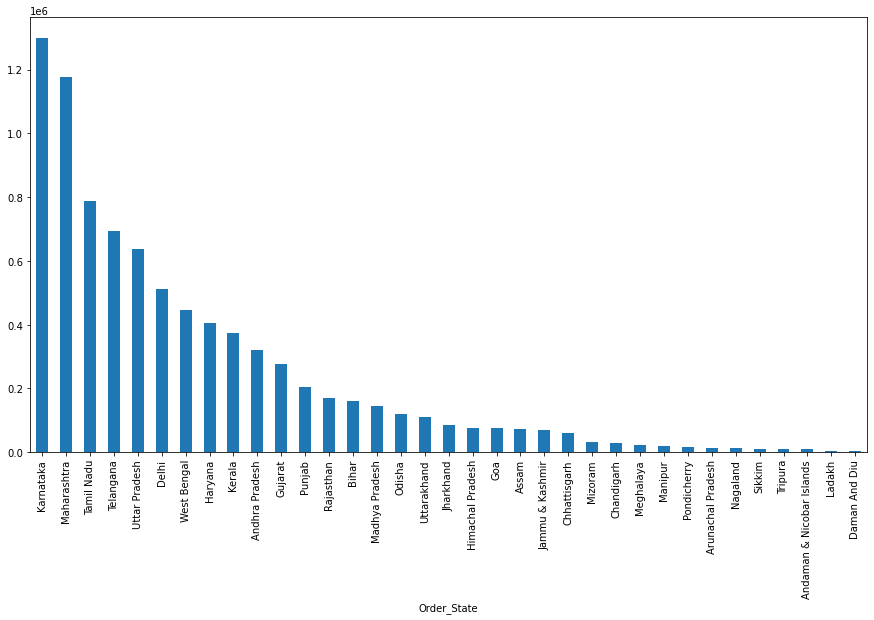

Total Sales amount for the State Maharashtra:  1177490.12
Total Sales amount for the State Madhya Pradesh:  145931.91
Total Sales amount for the State Tamil Nadu:  786793.47
Total Sales amount for the State Karnataka:  1298764.7
Total Sales amount for the State Uttar Pradesh:  638439.78
Total Sales amount for the State West Bengal:  445548.98
Total Sales amount for the State Haryana:  404572.34
Total Sales amount for the State Rajasthan:  169077.01
Total Sales amount for the State Telangana:  692968.29
Total Sales amount for the State Kerala:  375516.79
Total Sales amount for the State Manipur:  18790.69
Total Sales amount for the State Himachal Pradesh:  77426.35
Total Sales amount for the State Delhi:  513122.0
Total Sales amount for the State Goa:  75212.15
Total Sales amount for the State Uttarakhand:  110436.51
Total Sales amount for the State Jammu & Kashmir:  70108.07
Total Sales amount for the State Andhra Pradesh:  319838.07
Total Sales amount for the State Unknown:  0.0
Total

In [52]:
# Total sales order state wise
states = ['Maharashtra', 'Madhya Pradesh', 'Tamil Nadu', 'Karnataka',
       'Uttar Pradesh', 'West Bengal', 'Haryana', 'Rajasthan',
       'Telangana', 'Kerala', 'Manipur', 'Himachal Pradesh', 'Delhi',
       'Goa', 'Uttarakhand', 'Jammu & Kashmir', 'Andhra Pradesh',
       'Unknown', 'Gujarat', 'Punjab',
       'Dadra And Nagar Haveli And Daman And Diu',
       'Andaman & Nicobar Islands', 'Arunachal Pradesh', 'Mizoram',
       'Odisha', 'Bihar', 'Sikkim', 'Orissa', 'Tripura', 'Assam',
       'Nagaland', 'Pondicherry', 'Jharkhand', 'Chhattisgarh',
       'Meghalaya', 'Chandigarh', 'Ladakh']
plt.figure(figsize=(15,8))
df.groupby('Order_State')['Total_Payment'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()
for i in states:
    print(f'Total Sales amount for the State {i}: ',round(df[df['Order_State']==i]['Total_Payment'].sum(),2))

### Inferences:
* The State Karnataka has highest sales around 13L.
* The State Dadra And Nagar Haveli And Daman And Diu has lowest sales around 3K.

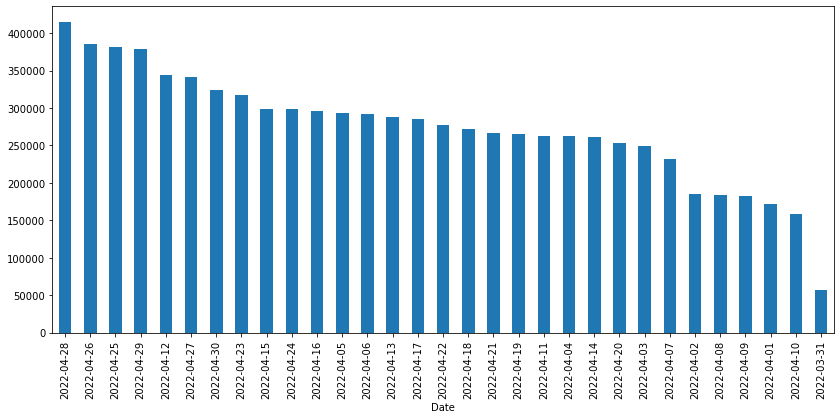

Total Sales amount for the date 2022-03-31 56372.56
Total Sales amount for the date 2022-04-01 171620.16
Total Sales amount for the date 2022-04-02 184532.1
Total Sales amount for the date 2022-04-03 249112.55
Total Sales amount for the date 2022-04-04 261960.55
Total Sales amount for the date 2022-04-05 293255.23
Total Sales amount for the date 2022-04-06 291353.49
Total Sales amount for the date 2022-04-07 232515.03
Total Sales amount for the date 2022-04-08 183241.24
Total Sales amount for the date 2022-04-09 182817.17
Total Sales amount for the date 2022-04-10 158065.9
Total Sales amount for the date 2022-04-11 262353.03
Total Sales amount for the date 2022-04-12 343885.55
Total Sales amount for the date 2022-04-13 287355.61
Total Sales amount for the date 2022-04-14 261562.33
Total Sales amount for the date 2022-04-15 298884.21
Total Sales amount for the date 2022-04-16 296022.45
Total Sales amount for the date 2022-04-17 285452.19
Total Sales amount for the date 2022-04-18 272050

In [53]:
# Total sales day wise
plt.figure(figsize=(14,6))
df.groupby('Date')['Total_Payment'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=90)
plt.show()
for i in df['Date'].unique():
    print(f'Total Sales amount for the date {i}',round(df[df['Date']==i]['Total_Payment'].sum(),2))

### Inferences:
* 28th of April 2022 has the highest sales around 4 lakhs.
* 31st of March 2022 has the lowest sales around 50K.

<Figure size 72x432 with 0 Axes>

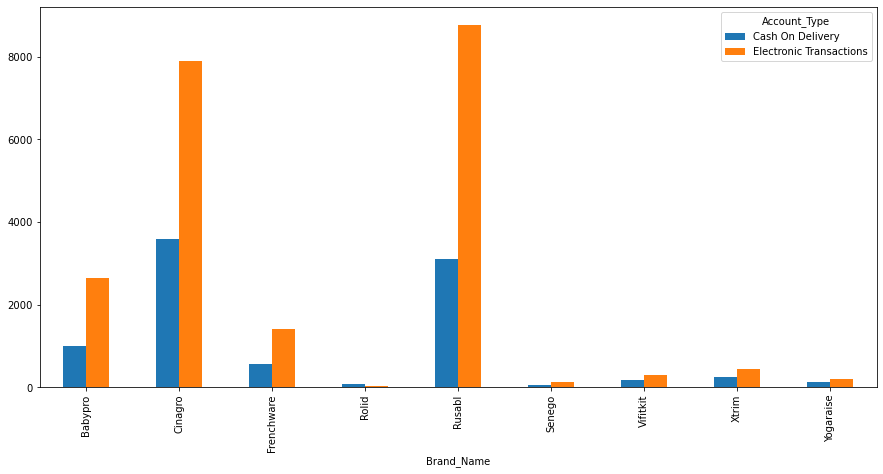

In [54]:
# brand name vs account type
plt.figure(figsize=(1,6))
pd.crosstab(df['Brand_Name'],df['Account_Type']).plot(kind='bar')
plt.show()

### Inferences:
* Rolid Brand customers prefer cash on delivery option than Electronic Transactions since Rolid Brand sells Metallic Locker products and its is costly compared to other brand products.
* Other Brands Prefers Cash on Delivery.

## Multivariate Analysis

In [55]:
df.groupby(['Brand_Name','Order_State'])["Total_Payment"].sum()

Brand_Name  Order_State              
Babypro     Andaman & Nicobar Islands       39.27
            Andhra Pradesh               17136.12
            Assam                         4737.60
            Bihar                         3603.07
            Chandigarh                     557.86
                                           ...   
Yogaraise   Tamil Nadu                    4046.67
            Telangana                     2707.03
            Uttar Pradesh                 5384.40
            Uttarakhand                   1566.33
            West Bengal                   2724.79
Name: Total_Payment, Length: 269, dtype: float64

## Dividing the records based on the brand names

In [56]:
df_Babypro=df[df['Brand_Name']=='Babypro']
df_Frenchware=df[df['Brand_Name']=='Frenchware']
df_Rusabl=df[df['Brand_Name']=='Rusabl']
df_Cinagro=df[df['Brand_Name']=='Cinagro']
df_Senego=df[df['Brand_Name']=='Senego']
df_Rolid=df[df['Brand_Name']=='Rolid']
df_Vifitkit=df[df['Brand_Name']=='Vifitkit']
df_Xtrim=df[df['Brand_Name']=='Xtrim']
df_Yogaraise=df[df['Brand_Name']=='Yogaraise']

we seperated Brands wise  from brand name column and store it as new variable.

### Total Payment of each brand with the respect to Order State

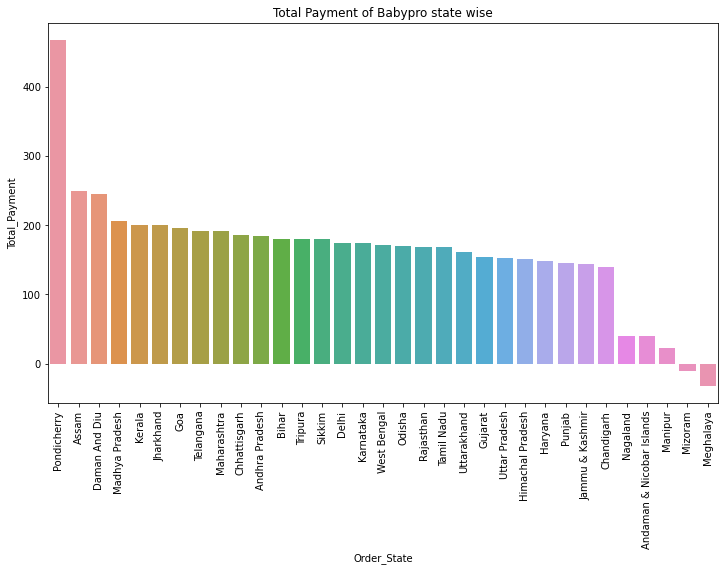

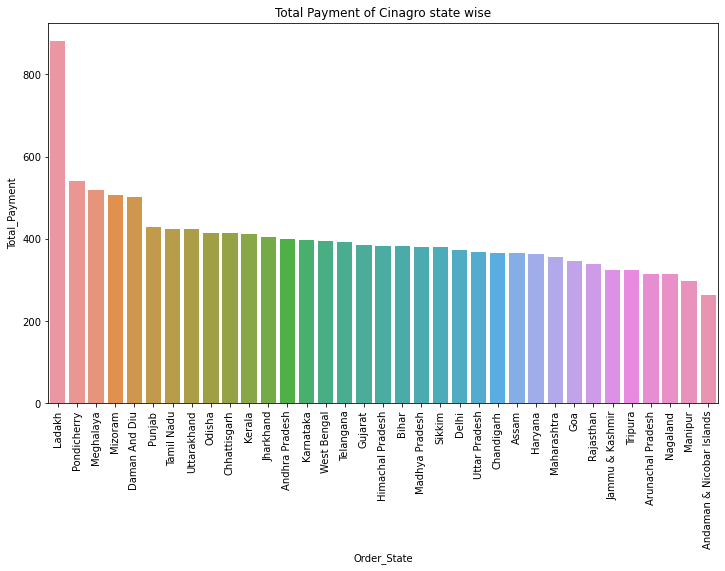

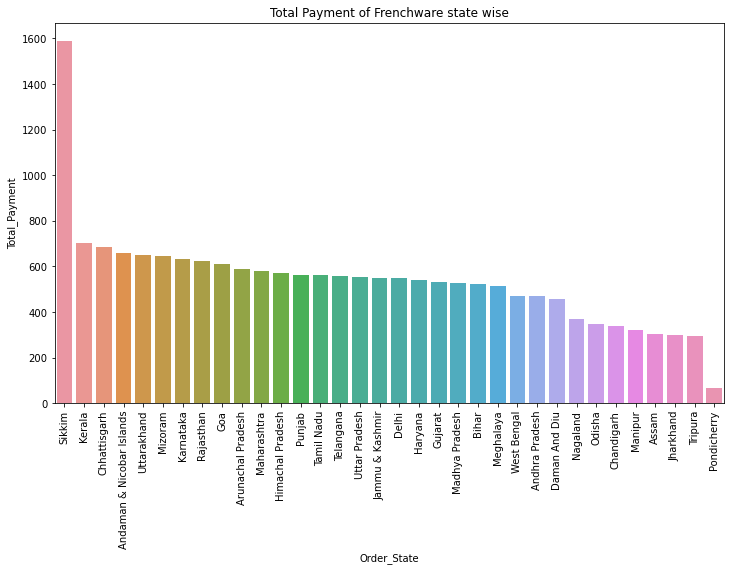

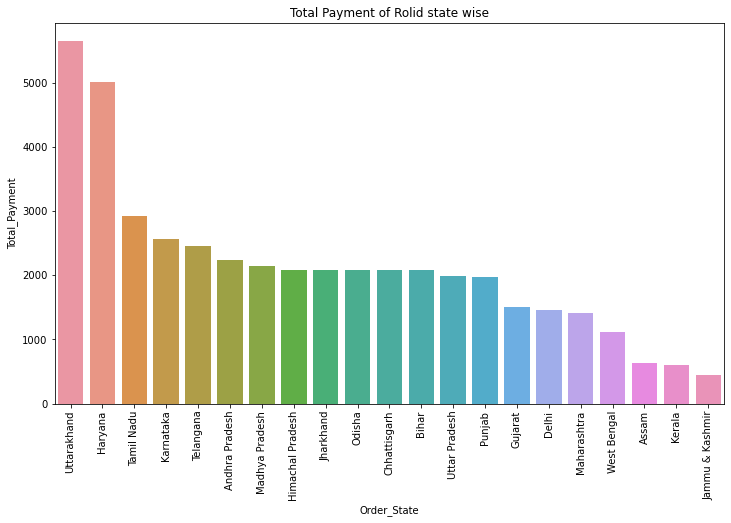

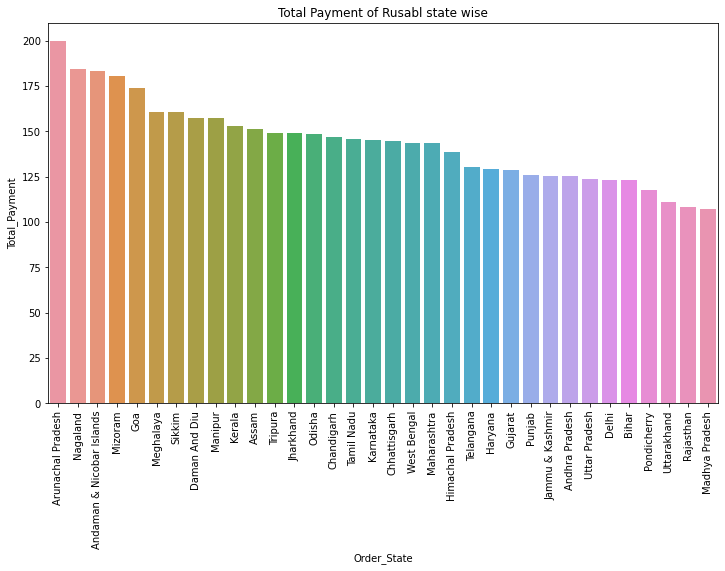

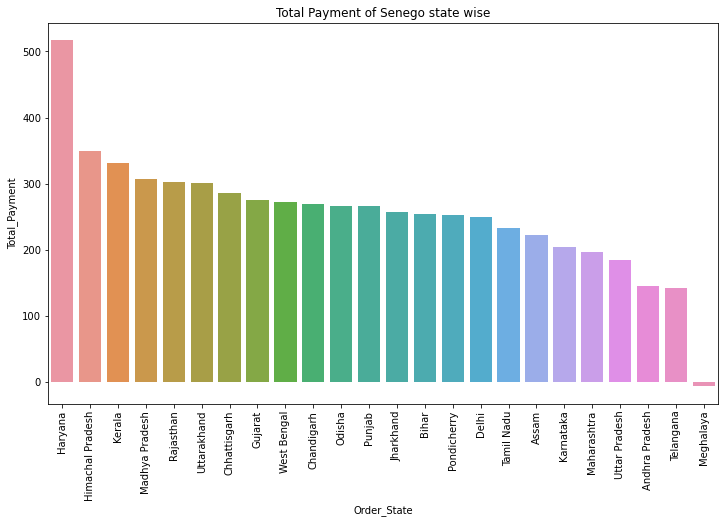

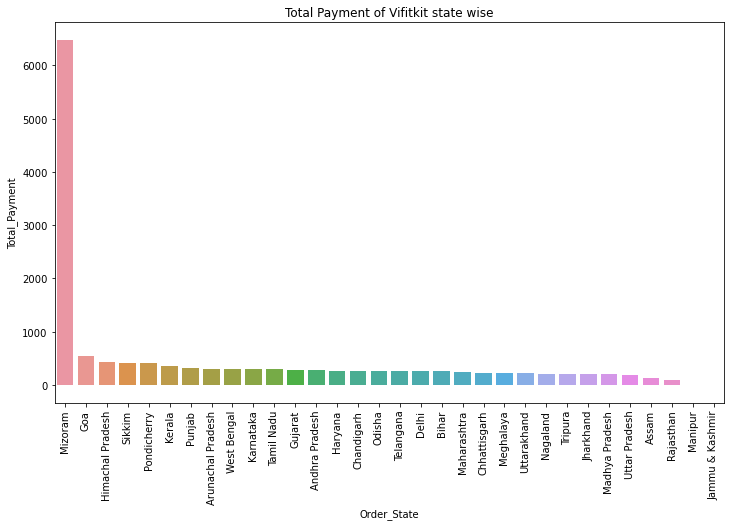

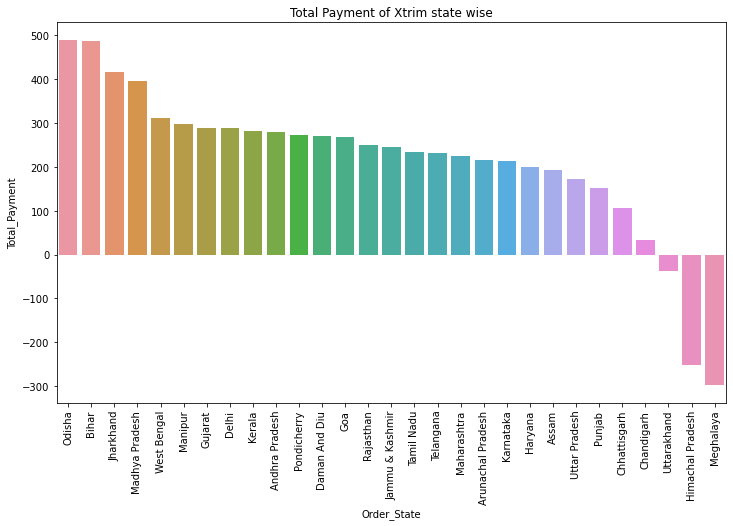

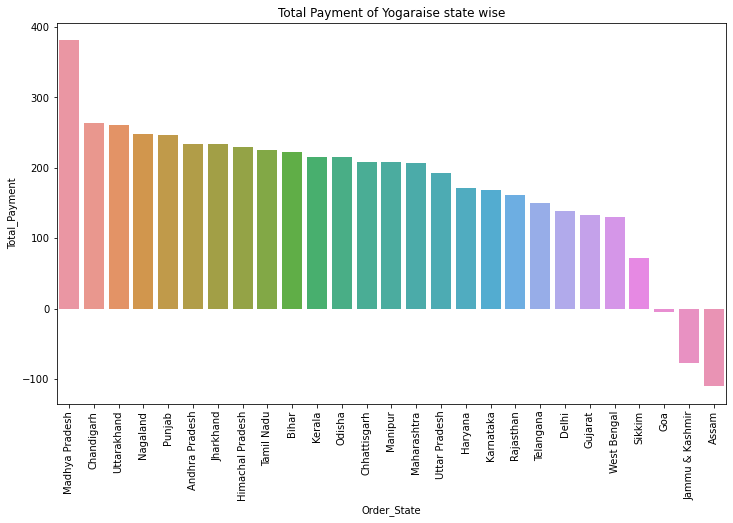

In [58]:
brands=[df_Babypro,df_Cinagro,df_Frenchware,df_Rolid,df_Rusabl,df_Senego,df_Vifitkit,df_Xtrim,df_Yogaraise]
brands_list=['Babypro','Cinagro','Frenchware','Rolid','Rusabl','Senego','Vifitkit','Xtrim','Yogaraise']
j=0
for i in brands:
    plt.figure(figsize=(12,7))
    order=i.groupby('Order_State')['Total_Payment'].mean().sort_values(ascending=False).index
    sns.barplot(x ='Order_State', y ="Total_Payment", data =i ,ci=None,order=order)
    plt.xticks(rotation=90)
    plt.title(f"Total Payment of {brands_list[j]} state wise")
    j+=1
    plt.show()

### Inference:

* Most of Total Payment of Babypro are from pondicherry and The states Mizoram, Meghalaya has negative sales since it has refund.
* Most of Total Payment of Cinagro are from Delhi and Manipur has low sales.
* Most of Total Payment of Frenchware are from Sikkim and Pondicherry has low sales.
* Most of Total Payment of Rolid are from Uttarkand and Jammu & Kashmir has low sales.
* Most of Total Payment of Rusabl are from Arunachal Pradhesh.
* Most of Total Payment of Senego are from Haryana and Meghalaya has low sales.
* Most of Total Payment of vifitkit are from Mizoram.
* Most of Total Payment of Xtrim are from Bihar and the states Uttarkhand, Himachal Pradesh, Meghalaya has negative sales.
* Most of Total Payment of Yogaraise are from Madhya Pradhesh and the states Jammu & Kashmir, Goa and Assam has negative sales.

### No of products sold in each State w.r.t Brand wise

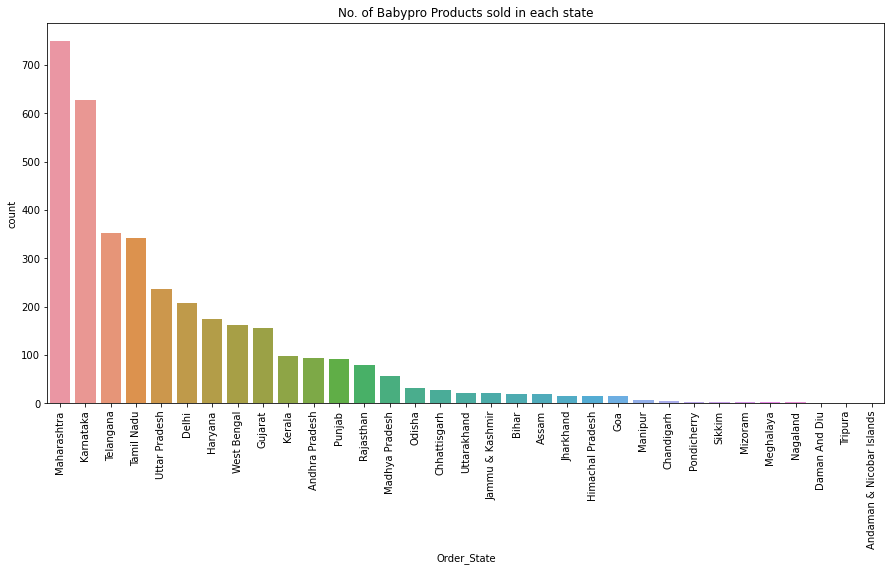

In [62]:
# Babypro
plt.figure(figsize=(15,7))
plt.title('No. of Babypro Products sold in each state')
plt.xticks(rotation=90)
large_to_small=df_Babypro.groupby('Order_State').size().sort_values().index[::-1]
sns.countplot(x = df_Babypro['Order_State'],order=large_to_small)
plt.show()

* **The Babypro has high sales in Maharastra followed by Karnataka**

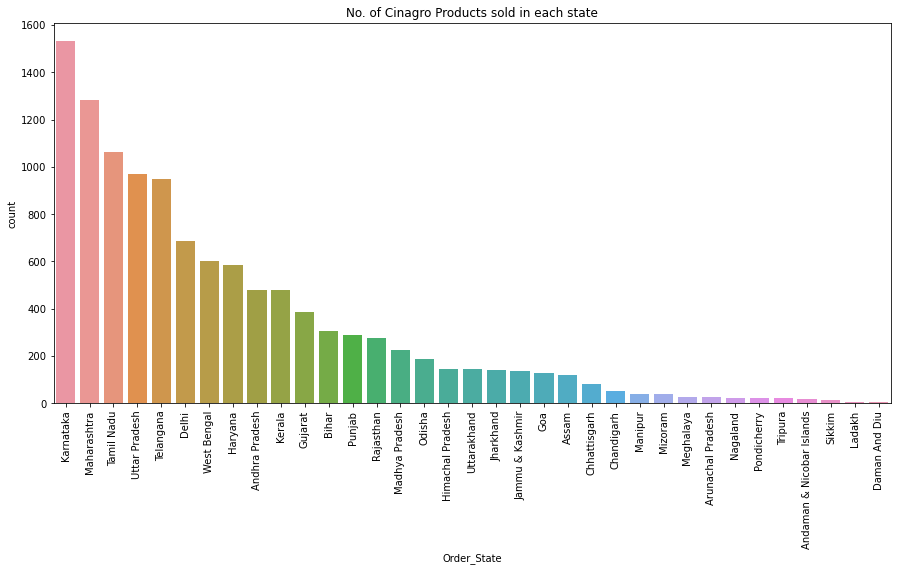

In [63]:
# Cinagro
plt.figure(figsize=(15,7))
plt.title('No. of Cinagro Products sold in each state')
plt.xticks(rotation=90)
large_to_small=df_Cinagro.groupby('Order_State').size().sort_values().index[::-1]
sns.countplot(x = df_Cinagro['Order_State'],order=large_to_small)
plt.show()

* The Cinagro has high sales in Karnataka followed by Maharastra and Tamil Nadu.
* The Cinagro has low sales Daman and Diu and Ladakh.

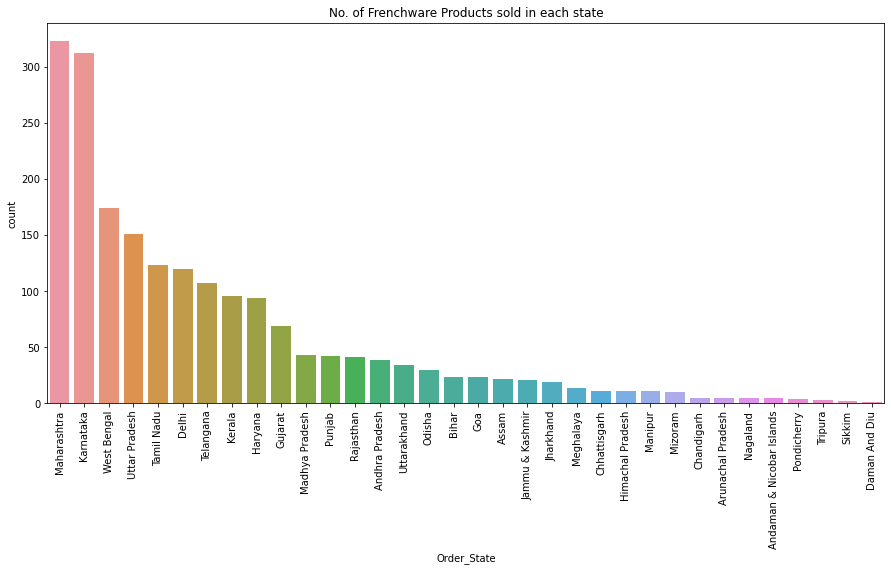

In [64]:
# Frenchware
plt.figure(figsize=(15,7))
plt.title('No. of Frenchware Products sold in each state')
plt.xticks(rotation=90)
large_to_small=df_Frenchware.groupby('Order_State').size().sort_values().index[::-1]
sns.countplot(x = df_Frenchware['Order_State'],order=large_to_small)
plt.show()

* The Frenchware has high sales in Maharastra and Karnataka.

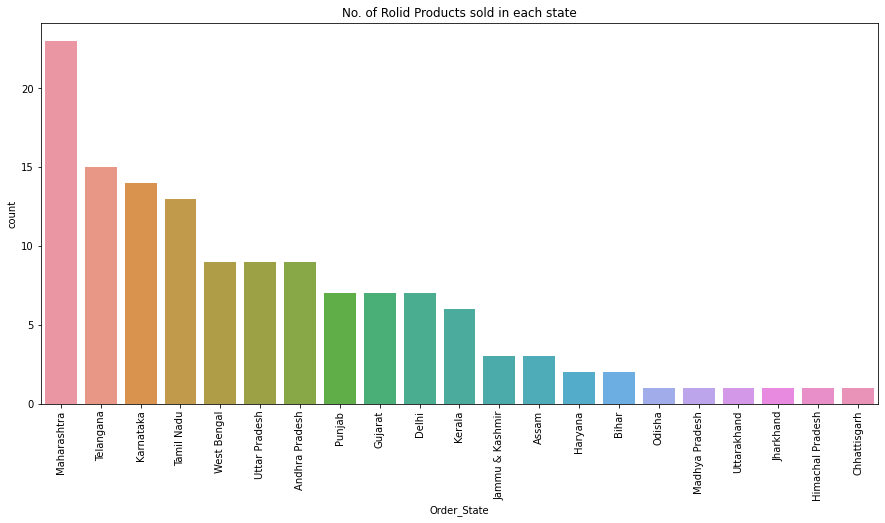

In [65]:
# Rolid
plt.figure(figsize=(15,7))
plt.title('No. of Rolid Products sold in each state')
plt.xticks(rotation=90)
large_to_small=df_Rolid.groupby('Order_State').size().sort_values().index[::-1]
sns.countplot(x = df_Rolid['Order_State'],order=large_to_small)
plt.show()

* The Rolid has high sales in Maharashtra followed by Telugana.

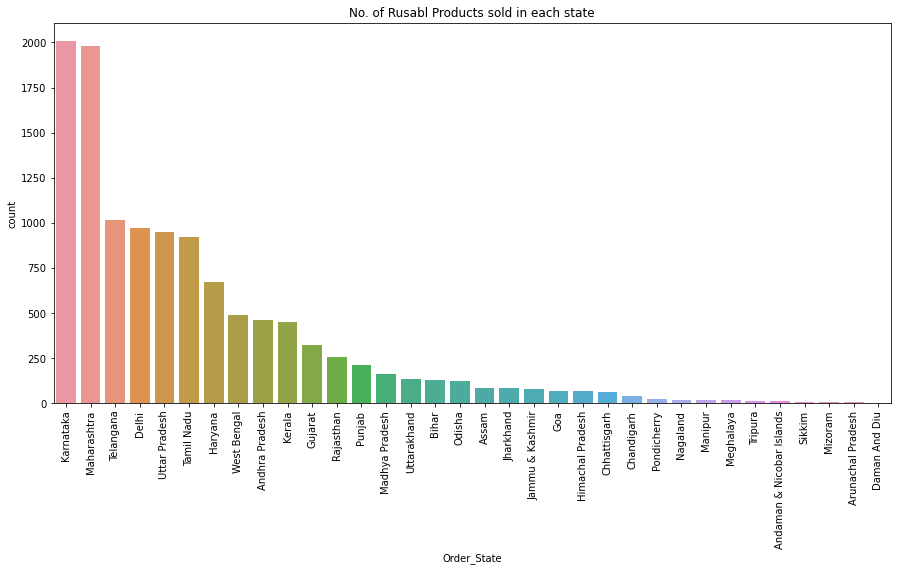

In [66]:
# Rusabl
plt.figure(figsize=(15,7))
plt.title('No. of Rusabl Products sold in each state')
plt.xticks(rotation=90)
large_to_small=df_Rusabl.groupby('Order_State').size().sort_values().index[::-1]
sns.countplot(x = df_Rusabl['Order_State'],order=large_to_small)
plt.show()

* The Rusabl has high sales in Karnataka and Maharastra.

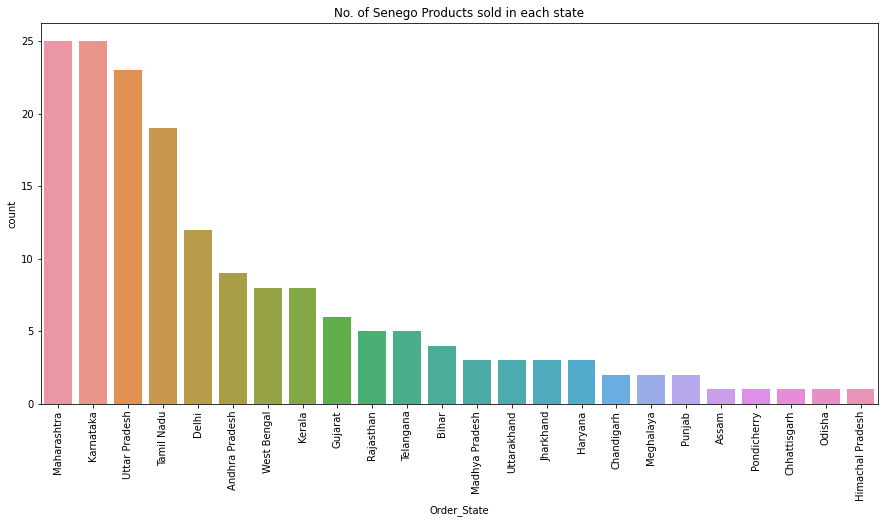

In [67]:
# Senego
plt.figure(figsize=(15,7))
plt.title('No. of Senego Products sold in each state')
plt.xticks(rotation=90)
large_to_small=df_Senego.groupby('Order_State').size().sort_values().index[::-1]
sns.countplot(x = df_Senego['Order_State'],order=large_to_small)
plt.show()

* The Senego product has high sales in Maharastra and Karnataka.m

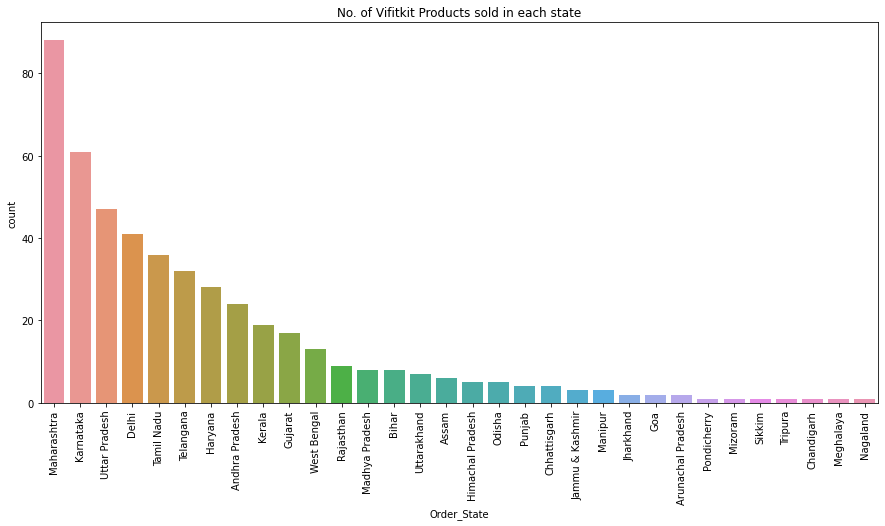

In [68]:
# Vifitkit
plt.figure(figsize=(15,7))
plt.title('No. of Vifitkit Products sold in each state')
plt.xticks(rotation=90)
large_to_small=df_Vifitkit.groupby('Order_State').size().sort_values().index[::-1]
sns.countplot(x = df_Vifitkit['Order_State'],order=large_to_small)
plt.show()

* The Vifitkit product has high sales in Maharastra and low sales in Mizoram, Meghalaya, Chandigarh, Nagaland, Sikkim, Pondicherry, and Tripura.

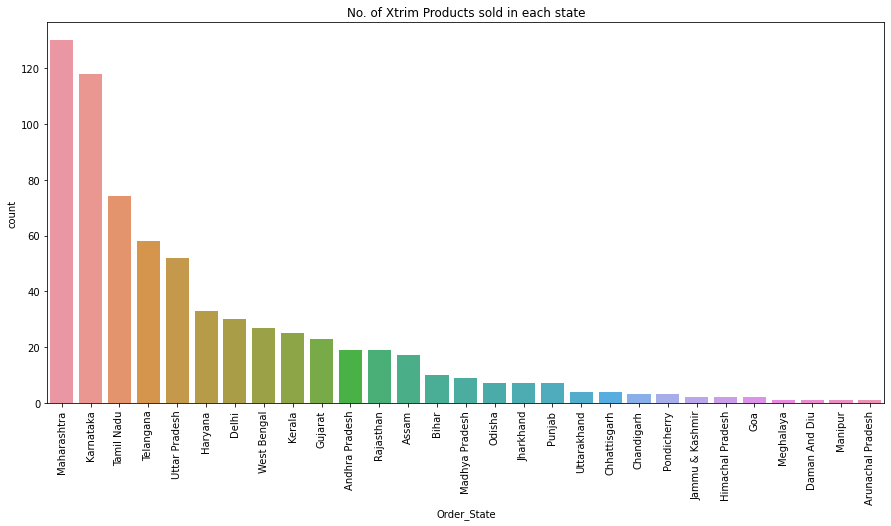

In [69]:
# Xtrim
plt.figure(figsize=(15,7))
plt.title('No. of Xtrim Products sold in each state')
plt.xticks(rotation=90)
large_to_small=df_Xtrim.groupby('Order_State').size().sort_values().index[::-1]
sns.countplot(x = df_Xtrim['Order_State'],order=large_to_small)
plt.show()

* The Xtrim has high sales in Maharastra and followed by Karnataka and Tamil Nadu.

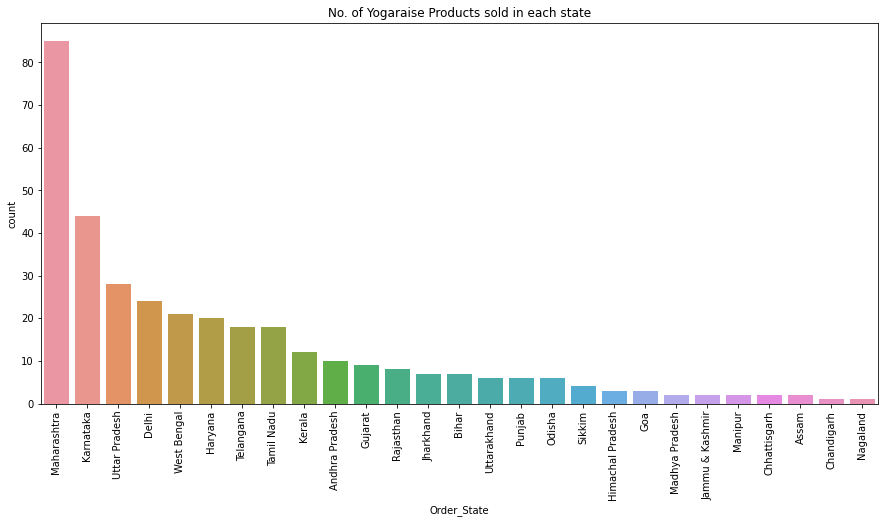

In [70]:
# Yogaraise
plt.figure(figsize=(15,7))
plt.title('No. of Yogaraise Products sold in each state')
plt.xticks(rotation=90)
large_to_small=df_Yogaraise.groupby('Order_State').size().sort_values().index[::-1]
sns.countplot(x = df_Yogaraise['Order_State'],order=large_to_small)
plt.show()

* The Yogaraise has high sales in Maharastra followed by Karnataka

<AxesSubplot:>

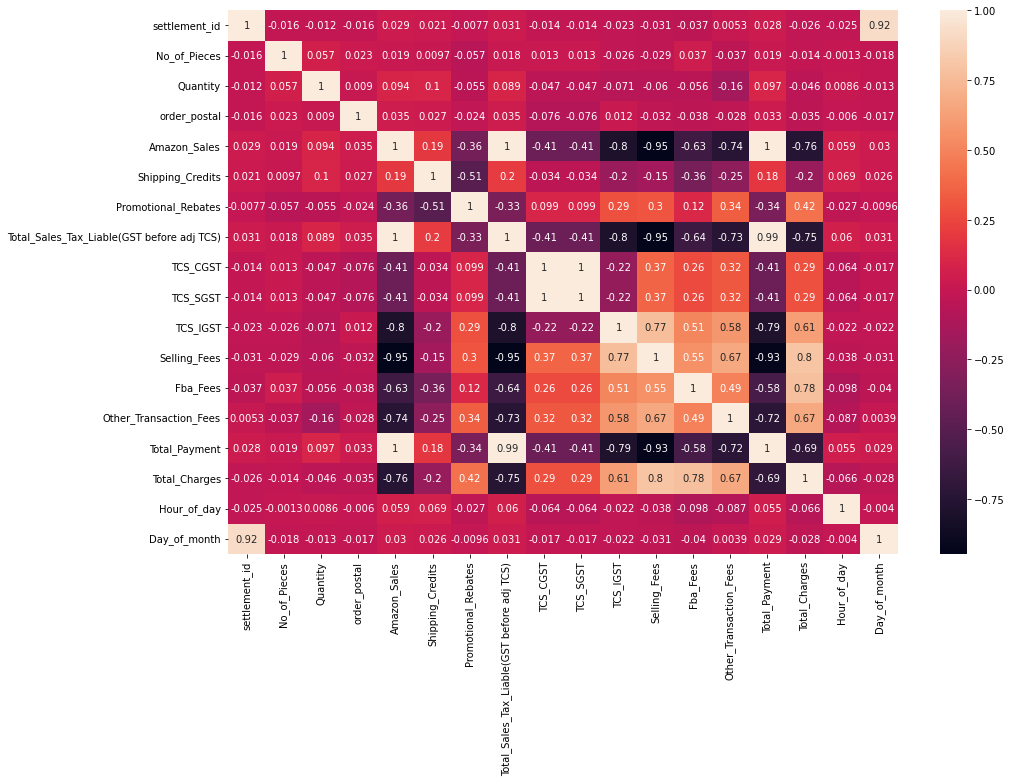

In [71]:
# Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

### Inferences:
* The Target variable has high correlation between amazon sales, Total_Sales_Tax. So before model building we need to remove those columns
* The Target variable has negative correlation between GST columns, Selling Fees, FBA fees.

### Creating Varaibles to Adjust the Correlation 

In [72]:
df.groupby('Sku')['Total_Payment'].describe()

,count,mean,std,min,25%,50%,75%,max
Sku,,,,,,,,
06-BD91-SLTZ,14.0,863.813571,1023.409218,-1571.73,1246.5500,1246.55,1246.550,1325.16
0N-FT7Z-4UCK,106.0,176.264151,126.804186,-275.57,189.6325,201.46,201.470,472.27
1C-D1Y2-X49Q,36.0,449.604444,362.251168,-741.32,554.8800,554.88,554.880,594.19
1X-9LGR-TBKF,5045.0,93.391243,45.595732,-174.94,100.5200,100.53,100.530,405.43
2O-47JX-DWKF,4.0,144.025000,288.050000,-288.05,144.0250,288.05,288.050,288.05
...,...,...,...,...,...,...,...,...
YGR-YOC-WNE-4MM-CB1,9.0,201.492222,230.994154,-356.20,176.8400,176.85,369.190,369.19
YGR-YOC-WNE-6MM-CB1-2,7.0,204.141429,314.219320,-499.13,266.1900,304.68,353.065,384.93
YGR-YOM-MRB-4MM,273.0,186.753919,220.217678,-428.79,208.1400,263.60,302.540,671.17


In [73]:
# Total_Payment stats basis Sku 

# MEAN
df['Mean_tgt_sku']=df.groupby('Sku')['Total_Payment'].transform('mean')

# Median 
df['Median_tgt_sku']=df.groupby('Sku')['Total_Payment'].transform('median')

#Min
df['Min_tgt_sku']=df.groupby('Sku')['Total_Payment'].transform('min')

# max
df['Max_tgt_sku']=df.groupby('Sku')['Total_Payment'].transform('max')

# std
df['Std_tgt_sku']=df.groupby('Sku')['Total_Payment'].transform('std')

<AxesSubplot:>

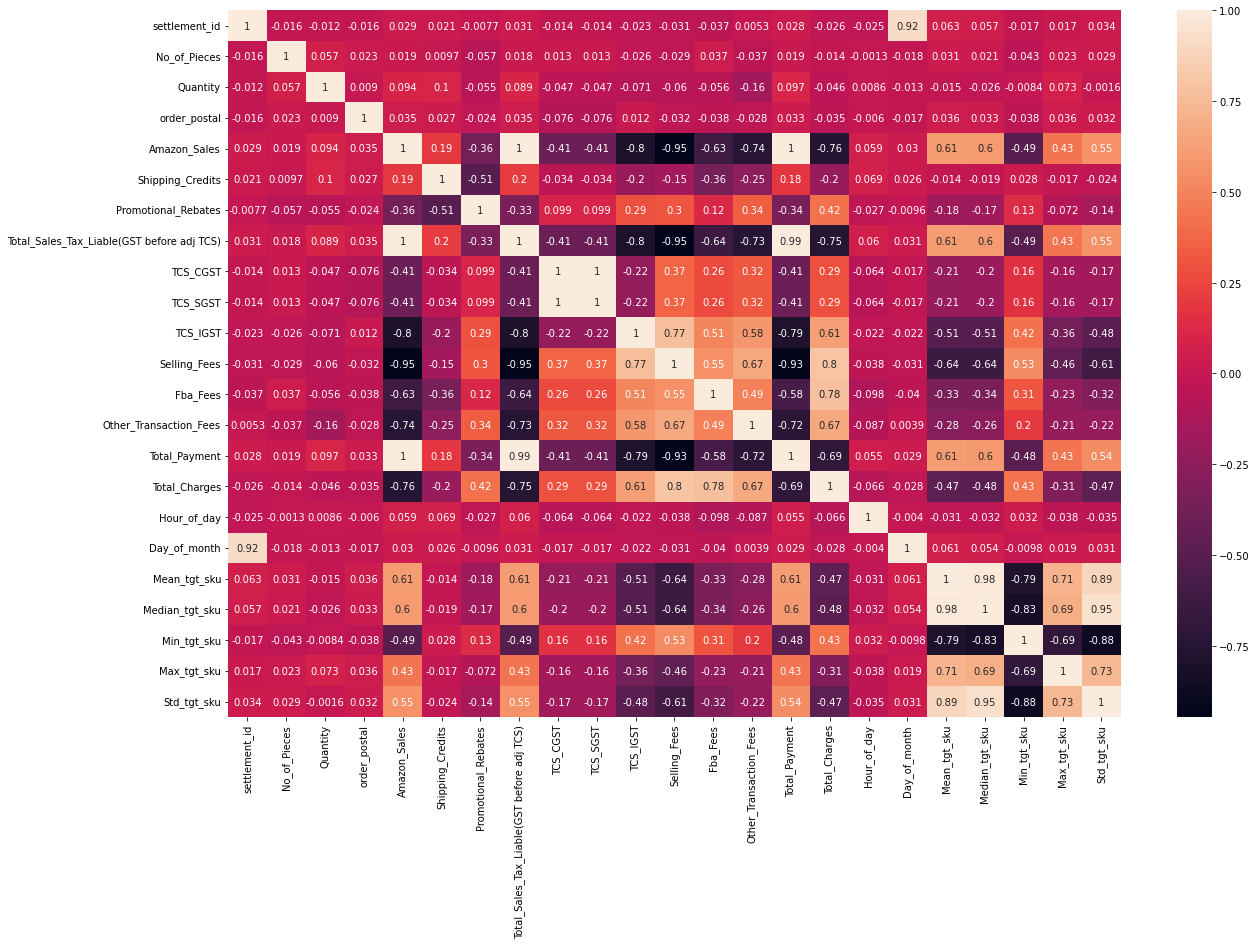

In [74]:
plt.figure(figsize=(20,13))
sns.heatmap(df.corr(),annot=True)

**Mean_tgt_sku and Median_tgt_sku is having positive correlation with target variable.**

In [75]:
df.select_dtypes(include=np.number).columns

Index(['settlement_id', 'No_of_Pieces', 'Quantity', 'order_postal',
       'Amazon_Sales', 'Shipping_Credits', 'Promotional_Rebates',
       'Total_Sales_Tax_Liable(GST before adj TCS)', 'TCS_CGST', 'TCS_SGST',
       'TCS_IGST', 'Selling_Fees', 'Fba_Fees', 'Other_Transaction_Fees',
       'Total_Payment', 'Total_Charges', 'Hour_of_day', 'Day_of_month',
       'Mean_tgt_sku', 'Median_tgt_sku', 'Min_tgt_sku', 'Max_tgt_sku',
       'Std_tgt_sku'],
      dtype='object')

## Outliers Detectors

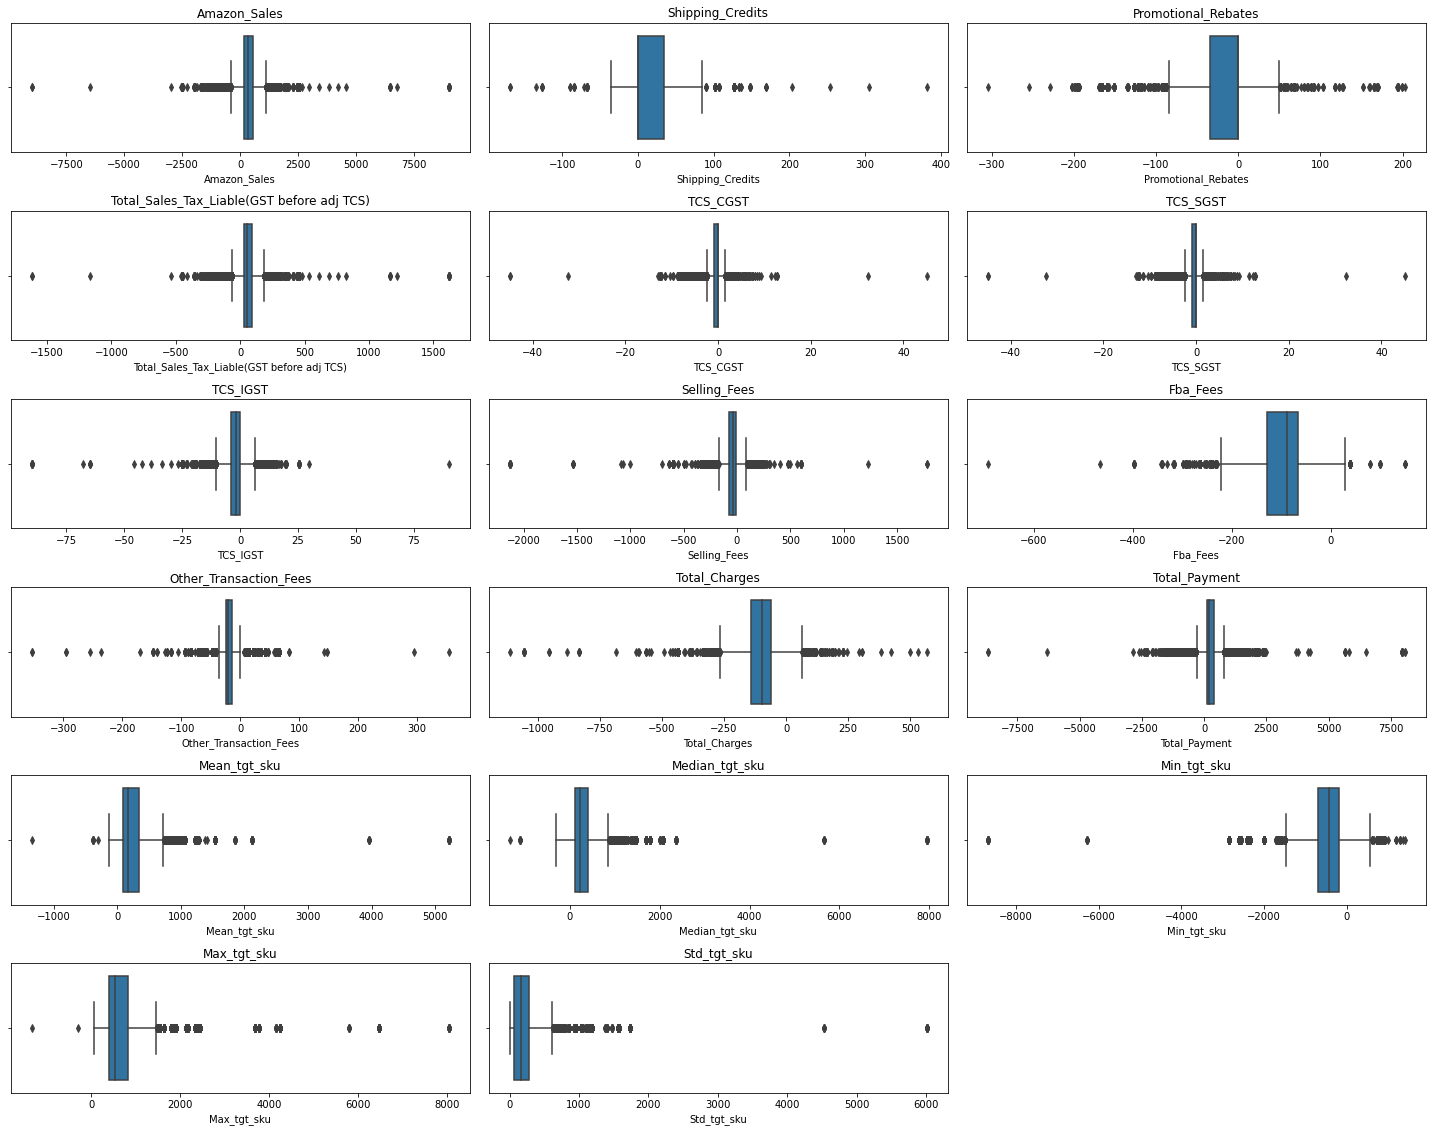

In [76]:
n_cols=[ 'Amazon_Sales','Shipping_Credits', 'Promotional_Rebates',
       'Total_Sales_Tax_Liable(GST before adj TCS)', 'TCS_CGST', 'TCS_SGST',
       'TCS_IGST', 'Selling_Fees', 'Fba_Fees', 'Other_Transaction_Fees', 'Total_Charges','Total_Payment',
       'Mean_tgt_sku', 'Median_tgt_sku', 'Min_tgt_sku', 'Max_tgt_sku',
       'Std_tgt_sku']
it=1
plt.figure(figsize=(20,18))
for i in n_cols:
    plt.subplot(7,3,it)
    sns.boxplot(x = df.loc[:,i])
    plt.title(i)
    it += 1
plt.tight_layout()
plt.show()

In [77]:
df['Date_Time']=df['Date_Time'].astype(object)
df['settlement_id']=df['settlement_id'].astype(object)

In [78]:
## Detecting  the Outliers
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
ul=q3+1.5*IQR
ll=q1-1.5*IQR
df[((df > ul)|(df<ll)).any(axis=1)]

,Date_Time,Date,Time,settlement_id,Type,order_id,Brand_Name,Sku,No_of_Pieces,description,Quantity,Account_Type,Fulfillment,Order_State,order_postal,Amazon_Sales,Shipping_Credits,Promotional_Rebates,Total_Sales_Tax_Liable(GST before adj TCS),TCS_CGST,TCS_SGST,TCS_IGST,Selling_Fees,Fba_Fees,Other_Transaction_Fees,Total_Payment,Total_Charges,Hour_of_day,Day_of_month,Mean_tgt_sku,Median_tgt_sku,Min_tgt_sku,Max_tgt_sku,Std_tgt_sku
3,2022-03-31 18:32:43+00:00,2022-03-31,18:32:43,17385380782,Order,402-0109356-1191517,Frenchware,FRW-SWH-BLK-P19,19.0,FrenchWare ® BPA-free FDA Approved CE Certifie...,1,Electronic Transactions,Amazon,Karnataka,560076.0,1605.94,0.00,-160.17,260.23,-7.23,-7.23,0.00,-231.51,-114.46,-41.30,1304.27,-301.67,18,31,1252.953353,1474.40,-1631.92,1644.71,736.485499
4,2022-03-31 18:32:59+00:00,2022-03-31,18:32:59,17385380782,Order,406-2137720-9015537,Frenchware,FRW-SBF-BLK-P18,18.0,FrenchWare ® Silicone BPA-Free Kitchen Utensil...,1,Electronic Transactions,Amazon,Uttar Pradesh,201014.0,1122.88,0.00,0.00,202.12,0.00,0.00,-11.23,-179.81,-114.46,-41.30,978.20,-144.68,18,31,712.558621,1008.84,-1190.44,1127.79,718.059010
6,2022-03-31 18:35:54+00:00,2022-03-31,18:35:54,17385380782,Order,403-7162124-9882761,Babypro,DPGH2,1.0,BabyPro Baby Safety Finger Pinch Guard by Cert...,1,Electronic Transactions,Amazon,Haryana,122004.0,356.24,0.00,0.00,42.76,-1.78,-1.78,0.00,-37.67,-64.90,-23.60,269.27,-86.97,18,31,298.016797,269.27,-668.35,1504.50,235.125024
7,2022-03-31 18:37:27+00:00,2022-03-31,18:37:27,17385346872,Order,406-3670819-0073930,Cinagro,CIN-DIA-16T-P50-BLK,50.0,CINAGRO Plastic Drip Irrigation Accessories Te...,1,Cash On Delivery,Amazon,Rajasthan,303302.0,247.46,33.90,0.00,50.64,0.00,0.00,-2.81,-44.79,-128.50,-14.16,141.74,-105.72,18,31,108.928667,129.50,-230.58,144.29,94.107333
8,2022-03-31 18:37:29+00:00,2022-03-31,18:37:29,17385380782,Order,404-8801006-2392350,Frenchware,FRW-SNS-GRN-P04,4.0,Frenchware® Super Premium Cooking Silicone Spa...,1,Electronic Transactions,Amazon,Maharashtra,400060.0,843.22,0.00,0.00,151.78,-4.22,-4.22,0.00,-135.03,-88.50,-21.24,741.79,-101.43,18,31,579.024400,731.42,-857.31,816.14,463.335092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31919,2022-04-30 10:27:13+00:00,2022-04-30,10:27:13,17595896832,Order,406-8833648-1234709,Vifitkit,VFK-YOM-RED-4MM,1.0,VIFITKIT Yoga & Exercise Mat for Gym Workout a...,2,Electronic Transactions,Amazon,Haryana,125055.0,712.50,71.42,-71.42,85.50,0.00,0.00,-7.12,-84.75,-123.81,-47.20,535.12,-177.38,10,30,255.277500,213.83,213.47,540.93,93.263046
31925,2022-04-30 12:56:38+00:00,2022-04-30,12:56:38,17595896832,Order,408-5300152-8346705,Xtrim,EF-XT-BH-ABSSLING-BLACK,1.0,"XTRIM Nylon-Padded, Heavy Duty Straps with Ste...",1,Electronic Transactions,Amazon,Karnataka,560046.0,761.86,0.00,0.00,137.14,-3.81,-3.81,0.00,-122.01,-115.64,-21.24,632.49,-129.37,12,30,273.756744,601.81,-772.53,1379.22,635.280702
31929,2022-04-30 16:01:18+00:00,2022-04-30,16:01:18,17595896832,Order,406-6345647-9866721,Vifitkit,VFK-MFR-BLU,1.0,VIFITKIT® Fitness Massage Foam Roller for Deep...,1,Electronic Transactions,Amazon,Karnataka,560062.0,516.96,35.72,-35.72,62.04,-2.58,-2.58,0.00,-75.15,-115.64,-21.24,361.81,-155.15,16,30,266.653333,361.80,-492.49,374.18,269.629263
31930,2022-04-30 16:18:28+00:00,2022-04-30,16:18:28,17595896832,Refund,408-9727670-2378724,Vifitkit,VFK-YOC-WNE-10MM-CB1,1.0,VIFITKIT 10mm Anti-Skid Yoga Mat with Strap an...,1,Electronic Transactions,Merchant,Karnataka,560061.0,-727.96,0.00,0.00,-131.04,3.64,3.64,0.00,93.25,0.00,35.40,-723.07,4.89,16,30,596.454286,699.75,-723.07,1399.50,637.622770


**There are 11486 outliers in the dataset. We are not dropping the outliers because it is sales data.**

## Statistical Test

###  T-test

In [79]:
n_cols=['No_of_Pieces', 'Quantity', 'Amazon_Sales',
       'Shipping_Credits', 'Promotional_Rebates',
       'Total_Sales_Tax_Liable(GST before adj TCS)', 'TCS_CGST', 'TCS_SGST',
       'TCS_IGST', 'Selling_Fees', 'Fba_Fees', 'Other_Transaction_Fees', 'Total_Charges',
       'Mean_tgt_sku', 'Median_tgt_sku', 'Min_tgt_sku', 'Max_tgt_sku',
       'Std_tgt_sku']

from scipy.stats import stats

# hypothesis testing between Total_Payment feature and other numerical features
# H0: Both groups have equal mean indicating that they are insignificant.
# H1: Both groups do not have equal mean indicating that they are significant.

significant_features=[]
for i in n_cols:
    pvalue=stats.ttest_ind(df[i],df.Total_Payment)[1]
    if pvalue<0.05:
        print(i,pvalue)
        significant_features.append(i)
    else:
        print(i,pvalue)

print()
print('The significant_features are\n ',significant_features)

No_of_Pieces 0.0
Quantity 0.0
Amazon_Sales 8.626056007861065e-154
Shipping_Credits 0.0
Promotional_Rebates 0.0
Total_Sales_Tax_Liable(GST before adj TCS) 0.0
TCS_CGST 0.0
TCS_SGST 0.0
TCS_IGST 0.0
Selling_Fees 0.0
Fba_Fees 0.0
Other_Transaction_Fees 0.0
Total_Charges 0.0
Mean_tgt_sku 1.0
Median_tgt_sku 1.0905472022868686e-89
Min_tgt_sku 0.0
Max_tgt_sku 0.0
Std_tgt_sku nan

The significant_features are
  ['No_of_Pieces', 'Quantity', 'Amazon_Sales', 'Shipping_Credits', 'Promotional_Rebates', 'Total_Sales_Tax_Liable(GST before adj TCS)', 'TCS_CGST', 'TCS_SGST', 'TCS_IGST', 'Selling_Fees', 'Fba_Fees', 'Other_Transaction_Fees', 'Total_Charges', 'Median_tgt_sku', 'Min_tgt_sku', 'Max_tgt_sku']


### Anova test of Brand  Name and total Payment 

In [80]:
from scipy.stats import stats
from scipy.stats import levene, f, f_oneway
# h0: there is no affect of Brand Name on total fees
# ha: there is affect of Brand Name on total fees

# Data Separation
df_B=df[df['Brand_Name']=='Babypro']['Total_Payment']
df_Ru=df[df['Brand_Name']=='Rusabl']['Total_Payment']
df_C=df[df['Brand_Name']=='Cinagro']['Total_Payment']
df_F=df[df['Brand_Name']=='Frenchware']['Total_Payment']
df_S=df[df['Brand_Name']=='Senego']['Total_Payment']
df_R=df[df['Brand_Name']=='Rolid']['Total_Payment']
df_V=df[df['Brand_Name']=='Vifitkit']['Total_Payment']
df_X=df[df['Brand_Name']=='Xtrim']['Total_Payment']
df_Y=df[df['Brand_Name']=='Yogaraise']['Total_Payment']

# Shapiro test/ Jacque bera test for checking whether data is normally distributed
print(f'jacque Bera for Babypro  {stats.jarque_bera(df_B)}')
print(f'jacque Bera for Rusabl  {stats.jarque_bera(df_Ru)}')
print(f'jacque Bera for Cinagro {stats.jarque_bera(df_C)}')
print(f'jacque Bera for Frenchware  {stats.jarque_bera(df_F)}')
print(f'jacque Bera for Senego  {stats.jarque_bera(df_S)}')
print(f'jacque Bera for Rolid {stats.jarque_bera(df_R)}')
print(f'jacque Bera for Vifitkit  {stats.jarque_bera(df_V)}')
print(f'jacque Bera for Xtrim  {stats.jarque_bera(df_X)}')
print(f'jacque Bera for Yogaraise  {stats.jarque_bera(df_Y)}')


# Levene Test
print( "Levene Test of all brand" ,levene(df_B,df_Ru,df_C,df_F,df_R,df_S,df_V,df_X,df_Y))

# alpha
alpha=0.05
t=df['Brand_Name'].nunique()
n=len(df)
f_alpha=f.isf(alpha,dfn=t-1,dfd=n-t)
print('f_alpha: ',f_alpha)

#f_oneway
stats,p_value=f_oneway(df_B,df_Ru,df_C,df_F,df_R,df_S,df_V,df_X,df_Y)
print('statistics:  ',stats)
print('p_value:  ',p_value)

jacque Bera for Babypro  Jarque_beraResult(statistic=76086.40716303358, pvalue=0.0)
jacque Bera for Rusabl  Jarque_beraResult(statistic=37116.700726474235, pvalue=0.0)
jacque Bera for Cinagro Jarque_beraResult(statistic=5564.824909410944, pvalue=0.0)
jacque Bera for Frenchware  Jarque_beraResult(statistic=490.1837532146298, pvalue=0.0)
jacque Bera for Senego  Jarque_beraResult(statistic=230.41004217016118, pvalue=0.0)
jacque Bera for Rolid Jarque_beraResult(statistic=36.08721463282233, pvalue=1.4580113671947004e-08)
jacque Bera for Vifitkit  Jarque_beraResult(statistic=420281.558933381, pvalue=0.0)
jacque Bera for Xtrim  Jarque_beraResult(statistic=516.5595214663678, pvalue=0.0)
jacque Bera for Yogaraise  Jarque_beraResult(statistic=422.8813287478292, pvalue=0.0)
Levene Test of all brand LeveneResult(statistic=945.2294883347029, pvalue=0.0)
f_alpha:  1.9387131493373229
statistics:   672.6980544125091
p_value:   0.0


## non-parametric test

* Since the data is not normaly distributed we are doing non-paramwtric test.

### Mannwhitney u

In [81]:
# H0 : that the feature does not carry any significance for the target.
# ha: the feature is significant var for the target.
from scipy.stats import mannwhitneyu
n_cols=[ 'Amazon_Sales','Shipping_Credits', 'Promotional_Rebates',
       'Total_Sales_Tax_Liable(GST before adj TCS)', 'TCS_CGST', 'TCS_SGST',
       'TCS_IGST', 'Selling_Fees', 'Fba_Fees', 'Other_Transaction_Fees', 'Total_Charges',
       'Mean_tgt_sku', 'Median_tgt_sku', 'Min_tgt_sku', 'Max_tgt_sku']

for i in n_cols:
    print(i , mannwhitneyu(df.loc[:, i],df['Total_Payment']))

Amazon_Sales MannwhitneyuResult(statistic=589660945.0, pvalue=0.0)
Shipping_Credits MannwhitneyuResult(statistic=79231520.5, pvalue=0.0)
Promotional_Rebates MannwhitneyuResult(statistic=73518974.5, pvalue=0.0)
Total_Sales_Tax_Liable(GST before adj TCS) MannwhitneyuResult(statistic=169077949.0, pvalue=0.0)
TCS_CGST MannwhitneyuResult(statistic=72598602.0, pvalue=0.0)
TCS_SGST MannwhitneyuResult(statistic=72598602.0, pvalue=0.0)
TCS_IGST MannwhitneyuResult(statistic=71789558.0, pvalue=0.0)
Selling_Fees MannwhitneyuResult(statistic=76062510.0, pvalue=0.0)
Fba_Fees MannwhitneyuResult(statistic=69127895.5, pvalue=0.0)
Other_Transaction_Fees MannwhitneyuResult(statistic=71085810.5, pvalue=0.0)
Total_Charges MannwhitneyuResult(statistic=69413862.5, pvalue=0.0)
Mean_tgt_sku MannwhitneyuResult(statistic=452233291.0, pvalue=3.1871177738792263e-25)
Median_tgt_sku MannwhitneyuResult(statistic=514840893.0, pvalue=2.497057711461898e-72)
Min_tgt_sku MannwhitneyuResult(statistic=53823825.5, pvalue=0.0

### Krushal Test

In [82]:
#Similar test to Anova  -  Krushall wallis test
# of each brand with total fees
from scipy.stats import kruskal

# Data Separation
df_B=df[df['Brand_Name']=='Babypro']['Total_Payment']
df_Ru=df[df['Brand_Name']=='Rusabl']['Total_Payment']
df_C=df[df['Brand_Name']=='Cinagro']['Total_Payment']
df_F=df[df['Brand_Name']=='Frenchware']['Total_Payment']
df_S=df[df['Brand_Name']=='Senego']['Total_Payment']
df_R=df[df['Brand_Name']=='Rolid']['Total_Payment']
df_V=df[df['Brand_Name']=='Vifitkit']['Total_Payment']
df_X=df[df['Brand_Name']=='Xtrim']['Total_Payment']
df_Y=df[df['Brand_Name']=='Yogaraise']['Total_Payment']

# Krushal Test
kruskal(df_B,df_Ru,df_C,df_F,df_R,df_S,df_V,df_X,df_Y)

KruskalResult(statistic=8031.7545060863185, pvalue=0.0)

since p-value < 0.05  both non-parametric test ,that means all variables are significant.

### Dropping the redundant variables.

In [83]:
# Dropping the redundant variabes and assigning to new_df
new_df=df.drop(['Date_Time','Date','Time','settlement_id','order_id','Sku','description','order_postal','Amazon_Sales', 'Shipping_Credits', 
         'Promotional_Rebates','Total_Sales_Tax_Liable(GST before adj TCS)', 'TCS_CGST', 'TCS_SGST',
       'TCS_IGST', 'Selling_Fees', 'Fba_Fees', 'Other_Transaction_Fees','Std_tgt_sku'],axis=1)

In [84]:
df.shape

(30827, 34)

In [85]:
new_df.shape

(30827, 15)

In [86]:
df.dtypes

Date_Time                                      object
Date                                           object
Time                                           object
settlement_id                                  object
Type                                           object
order_id                                       object
Brand_Name                                     object
Sku                                            object
No_of_Pieces                                  float64
description                                    object
Quantity                                        int64
Account_Type                                   object
Fulfillment                                    object
Order_State                                    object
order_postal                                  float64
Amazon_Sales                                  float64
Shipping_Credits                              float64
Promotional_Rebates                           float64
Total_Sales_Tax_Liable(GST b

##  Scaling

In [87]:
new_df.select_dtypes(include=np.number).columns

Index(['No_of_Pieces', 'Quantity', 'Total_Payment', 'Total_Charges',
       'Hour_of_day', 'Day_of_month', 'Mean_tgt_sku', 'Median_tgt_sku',
       'Min_tgt_sku', 'Max_tgt_sku'],
      dtype='object')

In [88]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

cols=[ 'Total_Charges', 'Mean_tgt_sku', 'Median_tgt_sku',
       'Min_tgt_sku', 'Max_tgt_sku']

for i in cols:
    new_df[i]=ss.fit_transform(new_df[[i]])

## Encoding

In [89]:
new_df.select_dtypes(include='O').columns

Index(['Type', 'Brand_Name', 'Account_Type', 'Fulfillment', 'Order_State'], dtype='object')

In [90]:
df.groupby('Brand_Name')['Total_Payment'].median()

Brand_Name
Babypro        179.73
Cinagro        365.33
Frenchware     431.02
Rolid         2083.18
Rusabl         100.53
Senego         265.70
Vifitkit       221.45
Xtrim          267.11
Yogaraise      250.63
Name: Total_Payment, dtype: float64

In [91]:
# Target Encoding for  Brand Name
median_BN=new_df.groupby('Brand_Name')['Total_Payment'].median()
new_df['Brand_Name']=new_df['Brand_Name'].map(median_BN)

In [92]:
# Target Encoding For Order state
median_os=df.groupby('Order_State')['Total_Payment'].median()
new_df['Order_State']=new_df['Order_State'].map(median_os)

In [93]:
# One Hot encoding for Type Account, Type, Fulfillment
new_df=pd.get_dummies(new_df,drop_first=True)

In [94]:
new_df.head(2)

,Brand_Name,No_of_Pieces,Quantity,Order_State,Total_Payment,Total_Charges,Hour_of_day,Day_of_month,Mean_tgt_sku,Median_tgt_sku,Min_tgt_sku,Max_tgt_sku,Type_Refund,Account_Type_Electronic Transactions,Fulfillment_Merchant
0,100.53,1.0,1,187.025,100.53,0.630528,18,31,-0.655563,-0.640373,0.712451,-0.536895,0,1,0
1,100.53,1.0,1,212.250,151.12,0.614324,18,31,-0.443081,-0.506704,0.584348,0.089037,0,0,0


## Segemention

In [95]:
# Kmeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans=KMeans()
visualizer=KElbowVisualizer(estimator=kmeans)

In [96]:
new_df.columns

Index(['Brand_Name', 'No_of_Pieces', 'Quantity', 'Order_State',
       'Total_Payment', 'Total_Charges', 'Hour_of_day', 'Day_of_month',
       'Mean_tgt_sku', 'Median_tgt_sku', 'Min_tgt_sku', 'Max_tgt_sku',
       'Type_Refund', 'Account_Type_Electronic Transactions',
       'Fulfillment_Merchant'],
      dtype='object')

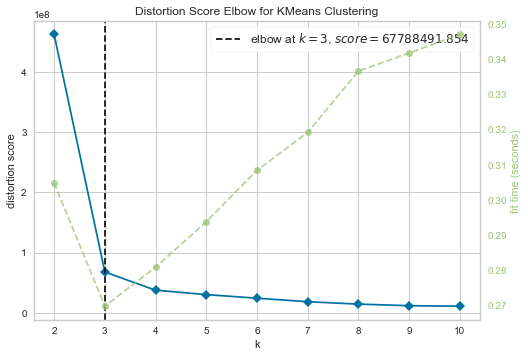

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [97]:
data=new_df.loc[:, ['Brand_Name','Order_State','Hour_of_day','Day_of_month']]
visualizer.fit(data)
visualizer.show()

In [98]:
# n_clusters=3
kmeans=KMeans(n_clusters=3,random_state=0)
k=kmeans.fit(data)
new_df['km_clusters']=k.labels_

In [99]:
df['km_clusters']=k.labels_

In [100]:
df['km_clusters'].value_counts()

0    16001
1    14691
2      135
Name: km_clusters, dtype: int64

# Model Building

In [101]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sma

# spliting the data
x=new_df.drop('Total_Payment',axis=1)
y=new_df['Total_Payment']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=7)

In [102]:
# adding constant
temp_train=sma.add_constant(xtrain)
temp_test=sma.add_constant(xtest)
model=sma.OLS(ytrain,temp_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Total_Payment   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     3743.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):               0.00
Time:                        21:48:23   Log-Likelihood:            -1.4953e+05
No. Observations:               21578   AIC:                         2.991e+05
Df Residuals:                   21562   BIC:                         2.992e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                  129.2840     17.431      7.417      0.000      95.119     163.449
Brand_Name                              -0.2259      0.018    -12.381      0.000      -0.262      -0.190
No_of_Pieces                            -0.0467      0.133     -0.350      0.727      -0.308       0.215
Quantity                               225.8710      8.708     25.937      0.000     208.802     242.940
Order_State                              0.0446      0.066      0.673      0.501      -0.085       0.174
Total_Charges                         -141.3127      2.551    -55.390      0.000    -146.313    -136.312
Hour_of_day                             -0.1590      0.299     -0.532      0.595      -0.745       0.427
Day_of_month                            -0.1861      0.196     -0.948      0.343      -0.571       0.199
Mean_tgt_sku                           151.3723      9.516     15.906      0.000     132.719     170.025
Median_tgt_sku                          68.9170     10.267      6.713      0.000      48.793      89.041
Min_tgt_sku                             -6.5606      3.348     -1.960      0.050     -13.122       0.001
Max_tgt_sku                              4.7578      2.633      1.807      0.071      -0.404       9.919
Type_Refund                           -730.1153      8.328    -87.671      0.000    -746.439    -713.792
Account_Type_Electronic Transactions    -2.6642      3.735     -0.713      0.476      -9.986       4.657
Fulfillment_Merchant                   237.1767      9.268     25.592      0.000     219.011     255.342
km_clusters                             29.2211      5.818      5.022      0.000      17.817      40.625
==============================================================================
Omnibus:                    37370.221   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        204264579.133
Skew:                         -11.454   Prob(JB):                         0.00
Kurtosis:                     479.096   Cond. No.                     3.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Inference:
* **We found that R-squared value for Linear Regression as base model is 0.723 and Adj.R-Squared value is 0.722.**
* **The Significance variable is Brand_Name, Quantity, Total_charges, Mean_tgt_sku, Median_tgt_sku, Type_Refund, Fulfillment_Merchant, km_clusters.**

## Assumption test

### Linearity - Rainbow Test

In [103]:
# Ho: data has linear relation with target variable.
# ha: data don't have linear relation with target variable.

sma.stats.linear_rainbow(model)
# Since the p_value < 0.05 data doesn't has linear relation with target variable.

(1.3150473382352872, 4.892944637230029e-46)

### Noramality test - Jacque bera test

In [104]:
# Ho: data is normal.
# ha: data is not normal.
from scipy.stats import stats
stats.jarque_bera(model.resid)
# Since P_value < 0.05 the data is not normally  distributed.

Jarque_beraResult(statistic=204264579.13250372, pvalue=0.0)

###  MULTICOLLINEARITY TEST- VIF

In [105]:
# Multicollinearity-variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_list=[]

for i in range(xtrain.shape[1]):
    vif_list.append(variance_inflation_factor(xtrain.values,i))
    
vif=pd.DataFrame({'Features':xtrain.columns,
               'VIF':vif_list}).sort_values('VIF',ascending=False)
vif

,Features,VIF
8,Median_tgt_sku,39.436234
7,Mean_tgt_sku,33.502881
3,Order_State,26.223004
2,Quantity,21.957949
0,Brand_Name,10.777003
14,km_clusters,5.875704
5,Hour_of_day,5.635236
6,Day_of_month,4.588193
9,Min_tgt_sku,4.137291
12,Account_Type_Electronic Transactions,3.326179


**By doing VIF(Variance Inflation Factor) for Multicollineariaty we found that Quantity ,Order state , Mean_tgt_sku , Median_tgt_sku having multicollineariaty.**

### Hetroskedasticity - Breusph pagan Test 

In [106]:
#Hypothesis:
# Ho: That there is equal variance present in the data.
# Ha:  There is unequal variance.

import statsmodels.stats.api as ssa
ssa.het_breuschpagan(model.resid,model.model.exog)
# There is no Heteroscadasticity in the data.

(3837.2719740091447, 0.0, 310.92019140878915, 0.0)

**By doing Breusph pagan test, we found that there is no Hetroskedastcity pattern.**

### Autocorrelation of error - Durbin watson

In [107]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)

1.9988599607304225

**By doing Durbin Watson Test for Autocorrelation of Errors we found that there’s positive Autocorrelation.**

## Linear Regression Model

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lr=LinearRegression()
pred_train=lr.fit(xtrain,ytrain).predict(xtrain)
pred_test=lr.fit(xtrain,ytrain).predict(xtest)

#R2_score
r2_train=r2_score(ytrain,pred_train)
r2_test=r2_score(ytest,pred_test)

#Mse
mse_train=mean_squared_error(ytrain,pred_train)
mse_test=mean_squared_error(ytest,pred_test)


#rmse
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)

### Creating the result dataframe

In [175]:
cols=['Model_Name','r2_score_train','r2_score_test','RMSE_train','RMSE_test']
d=pd.DataFrame(columns=cols,index=None)

In [176]:
# adding the results in dataframe
model_stats=pd.Series({'Model_Name':'Linear Regression',
                           'r2_score_train':r2_train,
                         'r2_score_test':r2_test ,
                           'RMSE_train':rmse_train,
                            'RMSE_test':rmse_test})

result=d.append(model_stats, ignore_index=True)

result

,Model_Name,r2_score_train,r2_score_test,RMSE_train,RMSE_test
0,Linear Regression,0.722522,0.749036,247.388842,212.230168


##  Decision Tree Regressor

In [177]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

dt=DecisionTreeRegressor(random_state=0)
pred_train=dt.fit(xtrain,ytrain).predict(xtrain)
pred_test=dt.fit(xtrain,ytrain).predict(xtest)

#R2_score
r2_train=r2_score(ytrain,pred_train)
r2_test=r2_score(ytest,pred_test)

#Mse
mse_train=mean_squared_error(ytrain,pred_train)
mse_test=mean_squared_error(ytest,pred_test)


#rmse
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)

In [178]:
# adding the results in dataframe
model_stats=pd.Series({'Model_Name':'Decision Tree Regressor',
                           'r2_score_train':r2_train,
                         'r2_score_test':r2_test ,
                           'RMSE_train':rmse_train,
                            'RMSE_test':rmse_test })

result=result.append(model_stats, ignore_index=True)

result

,Model_Name,r2_score_train,r2_score_test,RMSE_train,RMSE_test
0,Linear Regression,0.722522,0.749036,247.388842,212.230168
1,Decision Tree Regressor,1.0,0.952976,0.000231,91.867196


##  Random Forest Regressor

In [179]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=0)

pred_train=rf.fit(xtrain,ytrain).predict(xtrain)
pred_test=rf.fit(xtrain,ytrain).predict(xtest)

#R2_score
r2_train=r2_score(ytrain,pred_train)
r2_test=r2_score(ytest,pred_test)

#Mse
mse_train=mean_squared_error(ytrain,pred_train)
mse_test=mean_squared_error(ytest,pred_test)


#rmse
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)

In [180]:
 # adding the results in dataframe
model_stats=pd.Series({'Model_Name':'Random Forest Regressor',
                           'r2_score_train':r2_train,
                         'r2_score_test':r2_test ,
                           'RMSE_train':rmse_train,
                            'RMSE_test':rmse_test })

result=result.append(model_stats, ignore_index=True)

result

,Model_Name,r2_score_train,r2_score_test,RMSE_train,RMSE_test
0,Linear Regression,0.722522,0.749036,247.388842,212.230168
1,Decision Tree Regressor,1.0,0.952976,0.000231,91.867196
2,Random Forest Regressor,0.998348,0.968932,19.090272,74.672492


## Ada Boost Model

In [181]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(random_state=0)

pred_train=ada.fit(xtrain,ytrain).predict(xtrain)
pred_test=ada.fit(xtrain,ytrain).predict(xtest)

#R2_score
r2_train=r2_score(ytrain,pred_train)
r2_test=r2_score(ytest,pred_test)

#Mse
mse_train=mean_squared_error(ytrain,pred_train)
mse_test=mean_squared_error(ytest,pred_test)


#rmse
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)

In [182]:
 # adding the results in dataframe
model_stats=pd.Series({'Model_Name':'Ada Boost Regressor',
                           'r2_score_train':r2_train,
                         'r2_score_test':r2_test ,
                           'RMSE_train':rmse_train,
                            'RMSE_test':rmse_test })

result=result.append(model_stats, ignore_index=True)

result

,Model_Name,r2_score_train,r2_score_test,RMSE_train,RMSE_test
0,Linear Regression,0.722522,0.749036,247.388842,212.230168
1,Decision Tree Regressor,1.0,0.952976,0.000231,91.867196
2,Random Forest Regressor,0.998348,0.968932,19.090272,74.672492
3,Ada Boost Regressor,0.666257,0.593277,271.313873,270.178201


##  Gradient Boosting Regressor

In [183]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor(random_state=0)

pred_train=gbm.fit(xtrain,ytrain).predict(xtrain)
pred_test=gbm.fit(xtrain,ytrain).predict(xtest)

#R2_score
r2_train=r2_score(ytrain,pred_train)
r2_test=r2_score(ytest,pred_test)

#Mse
mse_train=mean_squared_error(ytrain,pred_train)
mse_test=mean_squared_error(ytest,pred_test)

#rmse
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)

In [184]:
# adding the results in dataframe
model_stats=pd.Series({'Model_Name':'Gradient Boosting Regressor',
                           'r2_score_train':r2_train,
                         'r2_score_test':r2_test ,
                           'RMSE_train':rmse_train,
                            'RMSE_test':rmse_test})

result=result.append(model_stats, ignore_index=True)

result

,Model_Name,r2_score_train,r2_score_test,RMSE_train,RMSE_test
0,Linear Regression,0.722522,0.749036,247.388842,212.230168
1,Decision Tree Regressor,1.0,0.952976,0.000231,91.867196
2,Random Forest Regressor,0.998348,0.968932,19.090272,74.672492
3,Ada Boost Regressor,0.666257,0.593277,271.313873,270.178201
4,Gradient Boosting Regressor,0.992776,0.97985,39.91692,60.135821


## XGboost Model

In [185]:
from xgboost import XGBRegressor
xg=XGBRegressor()

pred_train=xg.fit(xtrain,ytrain).predict(xtrain)
pred_test=xg.fit(xtrain,ytrain).predict(xtest)

#R2_score
r2_train=r2_score(ytrain,pred_train)
r2_test=r2_score(ytest,pred_test)

#Mse
mse_train=mean_squared_error(ytrain,pred_train)
mse_test=mean_squared_error(ytest,pred_test)

#rmse
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)

In [186]:
# adding the results in dataframe
model_stats=pd.Series({'Model_Name':'XGBoost Regressor',
                           'r2_score_train':r2_train,
                         'r2_score_test':r2_test ,
                           'RMSE_train':rmse_train,
                            'RMSE_test':rmse_test})

result=result.append(model_stats, ignore_index=True)

result

,Model_Name,r2_score_train,r2_score_test,RMSE_train,RMSE_test
0,Linear Regression,0.722522,0.749036,247.388842,212.230168
1,Decision Tree Regressor,1.0,0.952976,0.000231,91.867196
2,Random Forest Regressor,0.998348,0.968932,19.090272,74.672492
3,Ada Boost Regressor,0.666257,0.593277,271.313873,270.178201
4,Gradient Boosting Regressor,0.992776,0.97985,39.91692,60.135821
5,XGBoost Regressor,0.999848,0.995496,5.78215,28.430473


## Regularisation- Ridge with Parameter Tuning 

In [187]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,Lasso, ElasticNet
ridge=Ridge()
params={'alpha':[0.001,0.01,0.1,1,0.5,2,3,4,5]}

grid=GridSearchCV(estimator=ridge,param_grid=params,cv=5)
grid.fit(xtrain,ytrain)
grid.best_params_

{'alpha': 5}

### After tuning the Ridge Model

In [188]:
ridge=Ridge(alpha=5,random_state=0)
model_ridge=ridge.fit(xtrain,ytrain)
pred_train=model_ridge.predict(xtrain)
pred_test=model_ridge.predict(xtest)

#R2_score
r2_train=r2_score(ytrain,pred_train)
r2_test=r2_score(ytest,pred_test)

#Mse
mse_train=mean_squared_error(ytrain,pred_train)
mse_test=mean_squared_error(ytest,pred_test)

#rmse
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)

In [189]:
# adding the results in dataframe
model_stats=pd.Series({'Model_Name':'Ridge Model with Gridsearchcv',
                           'r2_score_train':r2_train,
                         'r2_score_test':r2_test ,
                           'RMSE_train':rmse_train,
                            'RMSE_test':rmse_test ,})

result=result.append(model_stats, ignore_index=True)

result

,Model_Name,r2_score_train,r2_score_test,RMSE_train,RMSE_test
0,Linear Regression,0.722522,0.749036,247.388842,212.230168
1,Decision Tree Regressor,1.0,0.952976,0.000231,91.867196
2,Random Forest Regressor,0.998348,0.968932,19.090272,74.672492
3,Ada Boost Regressor,0.666257,0.593277,271.313873,270.178201
4,Gradient Boosting Regressor,0.992776,0.97985,39.91692,60.135821
5,XGBoost Regressor,0.999848,0.995496,5.78215,28.430473
6,Ridge Model with Gridsearchcv,0.722519,0.748937,247.390348,212.271732


## Lasso

In [190]:
lasso=Lasso()
params={'alpha':[0.001,0.01,0.1,1,0.5,2,3,4,5]}

grid=GridSearchCV(estimator=lasso,param_grid=params,cv=5)
grid.fit(xtrain,ytrain)
grid.best_params_

{'alpha': 0.5}

In [191]:
lasso=Lasso(alpha=0.5,random_state=0)
model_ridge=lasso.fit(xtrain,ytrain)
pred_train=model_ridge.predict(xtrain)
pred_test=model_ridge.predict(xtest)

#R2_score
r2_train=r2_score(ytrain,pred_train)
r2_test=r2_score(ytest,pred_test)

#Mse
mse_train=mean_squared_error(ytrain,pred_train)
mse_test=mean_squared_error(ytest,pred_test)

#rmse
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)

In [192]:
# adding the results in dataframe
model_stats=pd.Series({'Model_Name':'Lasso Model with Gridsearchcv',
                           'r2_score_train':r2_train,
                         'r2_score_test':r2_test ,
                           'RMSE_train':rmse_train,
                            'RMSE_test':rmse_test})

result=result.append(model_stats, ignore_index=True)

result

,Model_Name,r2_score_train,r2_score_test,RMSE_train,RMSE_test
0,Linear Regression,0.722522,0.749036,247.388842,212.230168
1,Decision Tree Regressor,1.0,0.952976,0.000231,91.867196
2,Random Forest Regressor,0.998348,0.968932,19.090272,74.672492
3,Ada Boost Regressor,0.666257,0.593277,271.313873,270.178201
4,Gradient Boosting Regressor,0.992776,0.97985,39.91692,60.135821
5,XGBoost Regressor,0.999848,0.995496,5.78215,28.430473
6,Ridge Model with Gridsearchcv,0.722519,0.748937,247.390348,212.271732
7,Lasso Model with Gridsearchcv,0.722419,0.74929,247.435014,212.122677


## Ada Boost With parameter Tuning

In [128]:
params={'n_estimators':[20,30,10,40,50,100,150],
        'learning_rate':[0.11,0.17,0.4,1.45,1.23,1.9,1.7],
        'loss':['linear', 'square', 'exponential']}
ada=AdaBoostRegressor()
grid=GridSearchCV(estimator=ada,param_grid=params,cv=5)
grid.fit(xtrain,ytrain)
grid.best_params_

{'learning_rate': 0.11, 'loss': 'exponential', 'n_estimators': 40}

In [193]:
Ada=AdaBoostRegressor(random_state=0,n_estimators=40,loss='exponential',learning_rate=0.11)

pred_train=ada.fit(xtrain,ytrain).predict(xtrain)
pred_test=ada.fit(xtrain,ytrain).predict(xtest)

#R2_score
r2_train=r2_score(ytrain,pred_train)
r2_test=r2_score(ytest,pred_test)

#Mse
mse_train=mean_squared_error(ytrain,pred_train)
mse_test=mean_squared_error(ytest,pred_test)

#rmse
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)

In [194]:
# adding the results in dataframe
model_stats=pd.Series({'Model_Name':'AdaBoostRegressor Model with Gridsearchcv',
                           'r2_score_train':r2_train,
                         'r2_score_test':r2_test ,
                           'RMSE_train':rmse_train,
                            'RMSE_test':rmse_test})

result=result.append(model_stats, ignore_index=True)
result

,Model_Name,r2_score_train,r2_score_test,RMSE_train,RMSE_test
0,Linear Regression,0.722522,0.749036,247.388842,212.230168
1,Decision Tree Regressor,1.0,0.952976,0.000231,91.867196
2,Random Forest Regressor,0.998348,0.968932,19.090272,74.672492
3,Ada Boost Regressor,0.666257,0.593277,271.313873,270.178201
4,Gradient Boosting Regressor,0.992776,0.97985,39.91692,60.135821
5,XGBoost Regressor,0.999848,0.995496,5.78215,28.430473
6,Ridge Model with Gridsearchcv,0.722519,0.748937,247.390348,212.271732
7,Lasso Model with Gridsearchcv,0.722419,0.74929,247.435014,212.122677
8,AdaBoostRegressor Model with Gridsearchcv,0.666257,0.593277,271.313873,270.178201


## XGboost Model with Parameter Tuning

In [153]:
params={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4],
       'n_estimators':[20,30,10,40,50,100,150]}

xg=XGBRegressor()
grid=GridSearchCV(estimator=xg,param_grid=params,cv=5)
grid.fit(xtrain,ytrain)
grid.best_params_

{'gamma': 1, 'learning_rate': 0.4, 'max_depth': 5, 'n_estimators': 150}

In [195]:
from xgboost import XGBRFRegressor
xg=XGBRegressor(random_state=0,gamma=1,learning_rate=0.4,max_depth=5,n_estimators=150)

pred_train=xg.fit(xtrain,ytrain).predict(xtrain)
pred_test=xg.fit(xtrain,ytrain).predict(xtest)

#R2_score
r2_train=r2_score(ytrain,pred_train)
r2_test=r2_score(ytest,pred_test)

#Mse
mse_train=mean_squared_error(ytrain,pred_train)
mse_test=mean_squared_error(ytest,pred_test)

#rmse
rmse_train=np.sqrt(mse_train)
rmse_test=np.sqrt(mse_test)

In [196]:
 # adding the results in dataframe
model_stats=pd.Series({'Model_Name':'XGBRegressor Model with Gridsearchcv',
                           'r2_score_train':r2_train,
                         'r2_score_test':r2_test ,
                           'RMSE_train':rmse_train,
                            'RMSE_test':rmse_test})

result=result.append(model_stats, ignore_index=True)
result

,Model_Name,r2_score_train,r2_score_test,RMSE_train,RMSE_test
0,Linear Regression,0.722522,0.749036,247.388842,212.230168
1,Decision Tree Regressor,1.0,0.952976,0.000231,91.867196
2,Random Forest Regressor,0.998348,0.968932,19.090272,74.672492
3,Ada Boost Regressor,0.666257,0.593277,271.313873,270.178201
4,Gradient Boosting Regressor,0.992776,0.97985,39.91692,60.135821
5,XGBoost Regressor,0.999848,0.995496,5.78215,28.430473
6,Ridge Model with Gridsearchcv,0.722519,0.748937,247.390348,212.271732
7,Lasso Model with Gridsearchcv,0.722419,0.74929,247.435014,212.122677
8,AdaBoostRegressor Model with Gridsearchcv,0.666257,0.593277,271.313873,270.178201
9,XGBRegressor Model with Gridsearchcv,0.999885,0.995566,5.031633,28.210547


### Inferences:

* For Linear regression model we found that R2 score for train is **0.72** and r2 score for test data is **0.74**, RMSE for train in **247.38** and test is **212.23**.

* For Ada boost regressor model we found that R2 score for train is **0.66** and r2 score for test data is **0.59**, RMSE for train in **271.31** and test is **270.17**.

* For Gradiant Boost regressor model we found that R2 score for train is **0.99** and r2 score for test data is **0.97**, RMSE for train in **39.91** and test is **60.13**.

* For XG Boost regressor model we found that R2 score for train is **0.99** and r2 score for test data is **0.99**, RMSE for train in **5.78** and test is **28.43**.

* For Ridge model we found that R2 score for train is **0.72** and r2 score for test data is **0.74**, RMSE for train in **247.39** and test is **212.27**.


### **Ada Boost Regressor and Gradiant Boost Regressor are good models compared to other models**

## Cross validaition

In [132]:
from sklearn.model_selection import KFold

In [197]:
x=new_df.drop('Total_Payment',axis=1)
y=new_df['Total_Payment']

In [198]:
def base_models():
    models=dict()
    models['lr']=LinearRegression()
    models['dtree']=DecisionTreeRegressor()
    models['rf']=RandomForestRegressor()
    models['adaboost']=AdaBoostRegressor()
    models['gbm']=GradientBoostingRegressor()
    models['xgb']=XGBRegressor()
    return models

In [199]:
from sklearn.model_selection import KFold, cross_val_score

def eva_models(model):
    cv=KFold(n_splits=5,shuffle=True, random_state=42)
    scores=cross_val_score(estimator=model, X=x, y=y, scoring='r2', cv=cv , error_score='raise', n_jobs=-1)
    return scores

In [200]:
# Build the models......
models =base_models()

# List the results and model names
result, names=list(), list()

for name, model in models.items():
    scores =eva_models(model)
    result.append(scores)  # this will save the r1 score
    names.append(name) # this will save the name of the model
    print(">%s %.3f (%.3f)"%(name,np.mean(scores),np.std(scores)))

>lr 0.722 (0.065)
>dtree 0.970 (0.022)
>rf 0.981 (0.011)
>adaboost 0.434 (0.298)
>gbm 0.982 (0.008)
>xgb 0.990 (0.007)


In [201]:
from sklearn.model_selection import KFold, cross_val_score

def eva_models(model):
    cv=KFold(n_splits=5,shuffle=True, random_state=42)
    scores=cross_val_score(estimator=model, X=x, y=y, scoring='neg_root_mean_squared_error', cv=cv , error_score='raise', n_jobs=-1)
    return scores

In [202]:
# Build the models......
models =base_models()

# List the results and model names
result, names=list(), list()

for name, model in models.items():
    scores =eva_models(model)
    result.append(scores)  # this will save the r1 score
    names.append(name) # this will save the name of the model
    print(">%s %.3f (%.3f)"%(name,np.mean(scores),np.std(scores)))

>lr -238.512 (25.449)
>dtree -77.872 (22.557)
>rf -61.658 (18.234)
>adaboost -319.171 (56.967)
>gbm -58.877 (14.453)
>xgb -41.835 (15.828)


# Business Inference

#### We found that Cinagro have highest sales in Harayana compared to other brands and Senego and Xtrim have the negative sales in Megalaya because they have more return orders so company has to focus on those type of orders. 

#### Rusabl is having more customer service issue and loss inbound orders compared to other brands, so they need to work on customer service.

#### Amazon sales of these brands are very less in Andaman n Nicobar , Ladakh and Damen and Diu,  so they need to focus on marketing activities. 

#### We found that Cinagro have highest sales than other brands ,so they do have more FBA Inventory Reimbursement (Customer Return). So they can open a Storage facility and they can delivery products at least possible time and there will be less product inbounds and if still damage happens, they can make replacement of that product instead of giving a refund to the customer.
